# Progetto di Business Intelligence per i Servizi Finanziari

Jupyter Notebook relativo alle parti di codice python utilizzate per il progetto.

## 0. Requisiti necessari per questo playbook

è necessario avere python versione $\ge$ 3.8, inoltre sono necesarie le seguenti librerie:

- **pandas**
- **numpy**
- **yfinance**
- **matplotlib**
- **seaborn**
- **scipy**
- **statsmodels**
- **pmdarima**
- **backtrader**
- **pyfolio**

possono essere installate con i seguenti comandi:
```
pip install pandas
pip install numpy
pip install yfinance
pip install matplotlib
pip install seaborn
pip install scipy
pip install statsmodels
pip install pmdarima
pip install backtrader
pip install pyfolio
```

## 1. Titoli utilizzati in questo progetto
Sono utilizzati i seguenti titoli:

- Meta Platforms, Inc. (**FB**)
- Alphabet Inc. (**GOOG**)
- Raytheon Technologies Corporation (**RTX**)
- Lockheed Martin Corporation (**LMT**)
- Bank of America Corporation (**BAC**)
- JPMorgan Chase & Co. (**JPM**)

Importiamo ora i titoli direttamente da Yahoo Finance

In [1]:
# Import delle librerie principali utilizzate per il download dei dati e la loro rappresentazione
import pandas as pd
import numpy as np
import yfinance as yf # per effettuare il download diretto da yahoo finance
import matplotlib.pyplot as plt # per il plot dei grafici
import seaborn as sns # heatmaps

# Download dei dati per ogni titolo utilizzato
## titoli tecnologici
tecno_df = yf.download('FB GOOG', start='2011-11-30', end='2021-11-30')
fb_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
goog_df = yf.download('GOOG', start='2011-11-30', end='2021-11-30')
## titoli militari
mil_df = yf.download('RTX LMT', start='2011-11-30', end='2021-11-30')
rtx_df = yf.download('RTX', start='2011-11-30', end='2021-11-30')
lmt_df = yf.download('LMT', start='2011-11-30', end='2021-11-30')
## titoli bancari
banc_df = yf.download('BAC JPM', start='2011-11-30', end='2021-11-30')
bac_df = yf.download('BAC', start='2011-11-30', end='2021-11-30')
jpm_df = yf.download('JPM', start='2011-11-30', end='2021-11-30')

## tutti i titoli in un solo dataset
df_merged = yf.download('FB GOOG RTX LMT BAC JPM', start='2011-11-30', end='2021-11-30') # Download del dataset completo

COLORS = [plt.cm.cubehelix(x) for x in [0.1, 0.3, 0.5, 0.7]]

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed


Effetuiamo ora la fusione dei dati in un solo DataFrame e visualiziamo i primi 10 dati in tabella

In [2]:
# Creazione del dataframe di pandas
adj_close_tot = pd.DataFrame()

# NOTA: Si lavora con Adj Close in quanto tengono conto di eventuali azioni effettuate dalla azienda, come 
# lo split degli asset.

# popolazione del dataframe con i dati presi da yahoo finance
adj_close_tot["Meta Price"] = fb_df[["Adj Close"]] # NOTA: quotata in borsa da 18-05-2012
adj_close_tot["Alphabet Price"] = goog_df[["Adj Close"]]
adj_close_tot["Raytheon Price"] = rtx_df[["Adj Close"]]
adj_close_tot["Lockheed Martin Price"] = lmt_df[["Adj Close"]]
adj_close_tot["Bank of America Price"] = bac_df[["Adj Close"]]
adj_close_tot["JPMorgan Chase Price"] = jpm_df[["Adj Close"]]
adj_close_tot.dropna() # drop dei valori mancanti

adj_close_tot.head(10) # generazione tabella con i primi 10 valori

,Meta Price,Alphabet Price,Raytheon Price,Lockheed Martin Price,Bank of America Price,JPMorgan Chase Price
Date,,,,,,
2012-05-18,38.230000,299.078979,35.868061,60.931610,6.052374,25.427296
2012-05-21,34.029999,305.908386,36.522202,61.557262,5.888562,24.683233
2012-05-22,31.000000,299.278229,36.641132,61.601418,6.017885,25.822107
2012-05-23,32.000000,303.592072,36.700596,61.351166,6.181697,26.011923
2012-05-24,33.029999,300.702881,36.423096,61.365883,6.155833,25.791739
2012-05-25,31.910000,294.660553,36.185223,60.880096,6.164454,25.434895
2012-05-29,28.840000,296.060303,37.211014,61.579350,6.414480,25.533600
2012-05-30,28.190001,293.016693,36.542027,61.683636,6.215917,25.024889
2012-05-31,29.600000,289.345459,36.725380,61.683636,6.345414,25.169153


Visualiziamo i dati nel dataframe qui sopra in un graifo a linee, per visualizzare l'andamento del prezzo negli anni

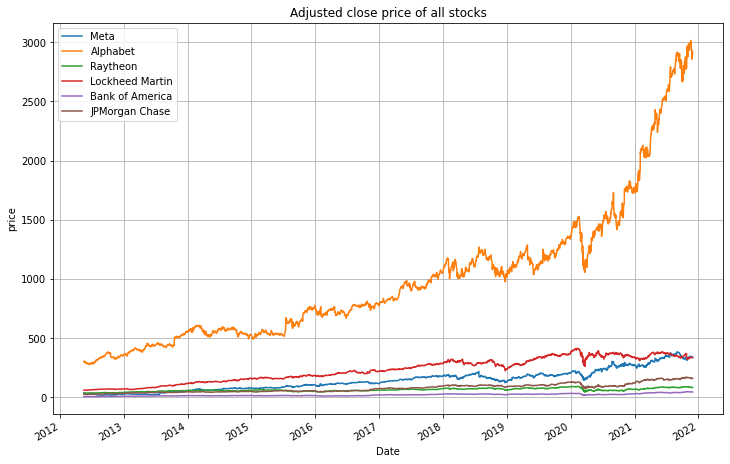

In [3]:
# plot del graifco, specificando i parametri necessari
adj_close_tot["Meta Price"].plot(figsize=(12,8), grid=True, label="Meta")
adj_close_tot["Alphabet Price"].plot(figsize=(12,8), grid=True, label="Alphabet")
adj_close_tot["Raytheon Price"].plot(figsize=(12,8), grid=True, label="Raytheon")
adj_close_tot["Lockheed Martin Price"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")
adj_close_tot["Bank of America Price"].plot(figsize=(12,8), grid=True, label="Bank of America")
adj_close_tot["JPMorgan Chase Price"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")

plt.legend(loc="upper left") # per mostrare la legenda in alto a sx
plt.title("Adjusted close price of all stocks") # titolo del grafico
plt.ylabel("price") # titolo della asse y (non determinato automaticamente)
plt.show()

## 2. Statistiche descrittive

### 2.1 Rendimenti semplici e composti

#### Titoli tecnologici

Tabella dei rendimenti semplici Netti e Lordi

In [4]:
# Raggruppamento dei dati con media
fb_group = fb_df.groupby(pd.Grouper(freq='M')).mean()
goog_group = goog_df.groupby(pd.Grouper(freq='M')).mean()

fb_month_returns = fb_group[['Adj Close']]
goog_month_returns = goog_group[['Adj Close']]
rendimenti_tecno = pd.DataFrame()

# Calcoli dei rendimenti netti e lordi per meta (FB)
rendimenti_netti_fb = np.log(fb_month_returns/fb_month_returns.shift(1))
rendimenti_lordi_fb = np.log(rendimenti_netti_fb + 1)

# Calcoli dei rendimenti netti e lordi per goog
rendimenti_netti_goog = np.log(goog_month_returns/goog_month_returns.shift(1))
rendimenti_lordi_goog = np.log(rendimenti_netti_goog + 1)

rendimenti_tecno["Rendimenti Netti Meta"] = rendimenti_netti_fb
rendimenti_tecno["Rendimenti Lordi Meta"] = rendimenti_lordi_fb
rendimenti_tecno["Rendimenti Netti Alphabet"] = rendimenti_netti_goog
rendimenti_tecno["Rendimenti Lordi Alphabet"] = rendimenti_lordi_goog
rendimenti_tecno = rendimenti_tecno.dropna()

rendimenti_tecno

,Rendimenti Netti Meta,Rendimenti Lordi Meta,Rendimenti Netti Alphabet,Rendimenti Lordi Alphabet
Date,,,,
2012-06-30,-0.075904,-0.078939,-0.059138,-0.060959
2012-07-31,-0.022612,-0.022872,0.043593,0.042669
2012-08-31,-0.362019,-0.449446,0.105718,0.100495
2012-09-30,0.025514,0.025194,0.080848,0.077746
2012-10-31,-0.000406,-0.000406,0.010737,0.010680
...,...,...,...,...
2021-07-31,0.049158,0.047988,0.056498,0.054959
2021-08-31,0.026913,0.026557,0.051407,0.050129
2021-09-30,0.002614,0.002611,0.018219,0.018055


Grafico a Linee dei rendimenti semplici netti

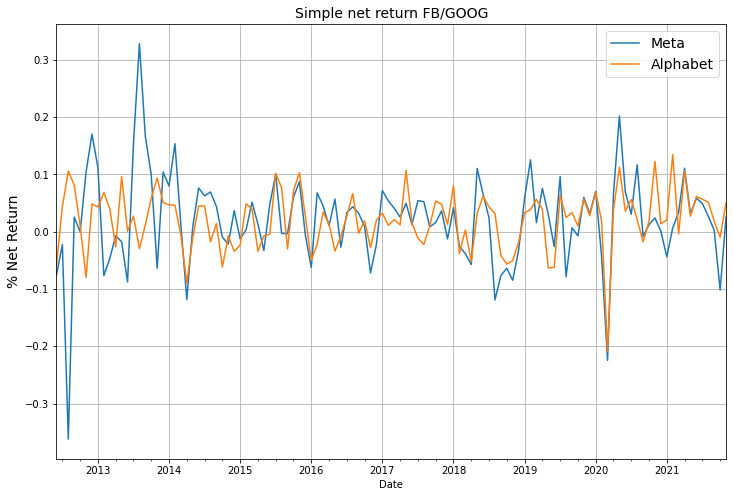

In [5]:
# Plot del grafico con rendimenti netti, utiliziamo plt per indicizzare il grafico
rendimenti_tecno["Rendimenti Netti Meta"].plot(figsize=(12,8), grid=True, label="Meta")
rendimenti_tecno["Rendimenti Netti Alphabet"].plot(figsize=(12,8), grid=True, label="Alphabet")

plt.legend(loc="upper right", fontsize=14)
plt.ylabel("% Net Return", fontsize=14)
plt.title("Simple net return FB/GOOG", fontsize=14)
plt.show()

#### Rendimenti composti
Tabella dei rendimenti composti

In [6]:
# Rendimenti composti per Meta (FB)
cumul_daily_return_fb = (1 + rendimenti_netti_fb).cumprod()
rendimenti_tecno["Rendimenti Compositi Meta"] = cumul_daily_return_fb

# Rendimenti composti per Alphabet (GOOG)
cumul_daily_return_goog = (1 + rendimenti_netti_goog).cumprod()
rendimenti_tecno["Rendimenti Compositi Alphabet"] = cumul_daily_return_goog

# Costruzione tabella con titoli colonne
rendimenti_tecno[["Rendimenti Compositi Meta", "Rendimenti Compositi Alphabet"]]

,Rendimenti Compositi Meta,Rendimenti Compositi Alphabet
Date,,
2012-06-30,0.924096,0.960711
2012-07-31,0.903201,1.002591
2012-08-31,0.576225,1.108583
2012-09-30,0.590927,1.198210
2012-10-31,0.590687,1.211075
...,...,...
2021-07-31,7.487620,7.603153
2021-08-31,7.689137,7.994008
2021-09-30,7.709239,8.139652


Grafico dei rendimenti composti

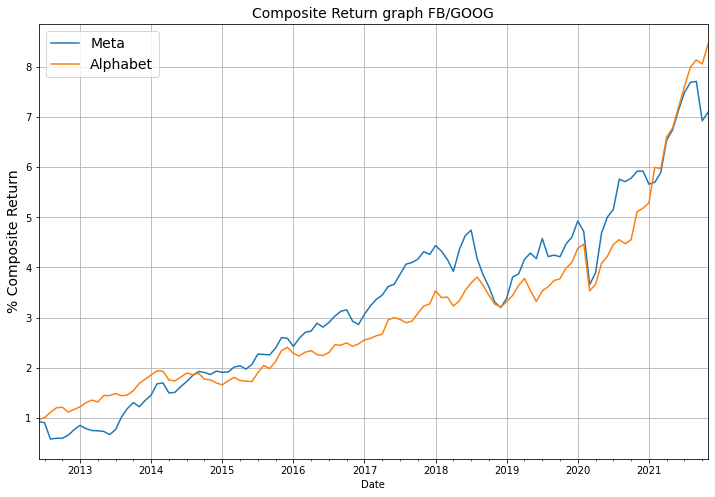

In [7]:
# Plot del grafico dei rendimenti compositi, con i rispettivi titoli
rendimenti_tecno["Rendimenti Compositi Meta"].plot(figsize=(12,8), grid=True, label="Meta")
rendimenti_tecno["Rendimenti Compositi Alphabet"].plot(figsize=(12,8), grid=True, label="Alphabet")

plt.legend(loc="upper left", fontsize=14)
plt.ylabel("% Composite Return", fontsize=14)
plt.title("Composite Return graph FB/GOOG", fontsize=14)
plt.show()

#### Commenti aggiuntivi su titoli tecnologici

Confronto sulle serie storiche di FB e GOOG per identificare una possibile correlazione, creando le seguenti grafiche:
1. Grafico isolato sul prezzo di GOOG e FB
2. Tabella con indice correlazione

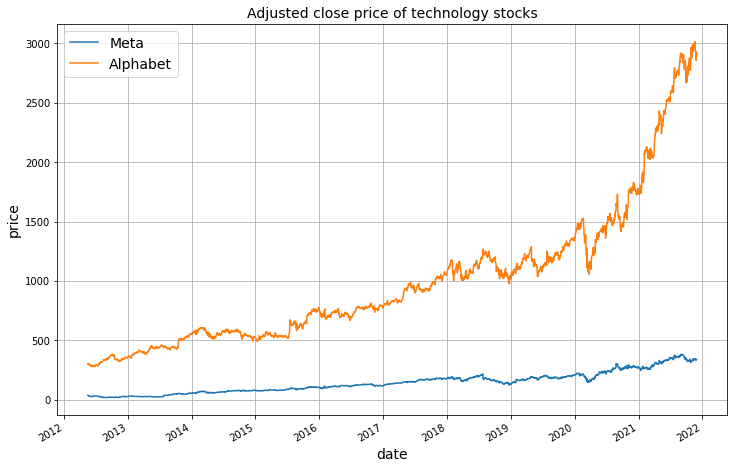

In [8]:
# Creiamo un nuovo dataframe per isolare il prezzo di GOOG e FB
adj_close_tecno = pd.DataFrame()

adj_close_tecno["Meta Price"] = fb_df[["Adj Close"]]
adj_close_tecno["Alphabet Price"] = goog_df[["Adj Close"]]

adj_close_tecno["Meta Price"].plot(figsize=(12,8), grid=True, label="Meta")
adj_close_tecno["Alphabet Price"].plot(figsize=(12,8), grid=True, label="Alphabet")
plt.title("Adjusted close price of technology stocks", fontsize=14) # titolo del grafico
plt.legend(loc="upper left", fontsize=14)
plt.ylabel("price", fontsize=14) # titolo della asse y (non determinato automaticamente)
plt.xlabel("date", fontsize=14)
plt.show()

In [9]:
# Calcoliamo ora la correlazione utilizzando la funzione interna di pandas
adj_close_tecno.corr()

,Meta Price,Alphabet Price
Meta Price,1.000000,0.962272
Alphabet Price,0.962272,1.000000


#### Titoli militari

Tabella dei rendimenti semplici Netti e Lordi per RTX e LMT

In [10]:
# Raggruppamento dei dati con media
rtx_group = rtx_df.groupby(pd.Grouper(freq='M')).mean()
lmt_group = lmt_df.groupby(pd.Grouper(freq='M')).mean()

rtx_month_returns = rtx_group[['Adj Close']]
lmt_month_returns = lmt_group[['Adj Close']]
rendimenti_mil = pd.DataFrame()

# Calcoli dei rendimenti netti e lordi per Raytheon (RTX)
rendimenti_netti_rtx = np.log(rtx_month_returns/rtx_month_returns.shift(1))
rendimenti_lordi_rtx = np.log(rendimenti_netti_rtx + 1)

# Calcoli dei rendimenti netti e lordi per Lockheed Martin (LMT)
rendimenti_netti_lmt = np.log(lmt_month_returns/lmt_month_returns.shift(1))
rendimenti_lordi_lmt = np.log(rendimenti_netti_lmt + 1)

rendimenti_mil["Rendimenti Netti Raytheon"] = rendimenti_netti_rtx
rendimenti_mil["Rendimenti Lordi Raytheon"] = rendimenti_lordi_rtx
rendimenti_mil["Rendimenti Netti Lockheed Martin"] = rendimenti_netti_lmt
rendimenti_mil["Rendimenti Lordi Lockheed Martin"] = rendimenti_lordi_lmt
rendimenti_mil = rendimenti_mil.dropna()

rendimenti_mil

,Rendimenti Netti Raytheon,Rendimenti Lordi Raytheon,Rendimenti Netti Lockheed Martin,Rendimenti Lordi Lockheed Martin
Date,,,,
2011-12-31,-0.005292,-0.005306,0.016011,0.015884
2012-01-31,0.027827,0.027447,0.038575,0.037850
2012-02-29,0.082457,0.079234,0.066358,0.064249
2012-03-31,0.012832,0.012750,0.034661,0.034074
2012-04-30,-0.034980,-0.035606,0.010139,0.010088
...,...,...,...,...
2021-07-31,-0.022304,-0.022557,-0.016970,-0.017116
2021-08-31,0.007073,0.007048,-0.045274,-0.046331
2021-09-30,-0.015047,-0.015162,-0.030881,-0.031368


Grafico a Linee dei rendimenti semplici netti

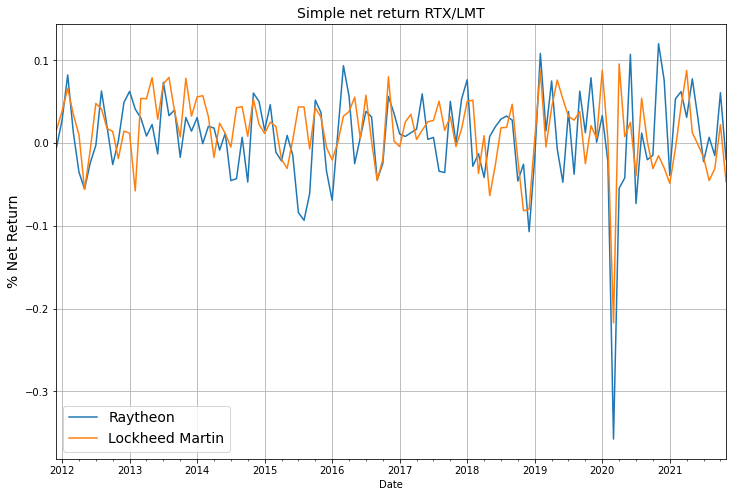

In [11]:
# Plot del grafico con rendimenti netti, utiliziamo plt per indicizzare il grafico
rendimenti_mil["Rendimenti Netti Raytheon"].plot(figsize=(12,8), grid=True, label="Raytheon")
rendimenti_mil["Rendimenti Netti Lockheed Martin"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")

plt.legend(loc="lower left", fontsize=14)
plt.ylabel("% Net Return", fontsize=14)
plt.title("Simple net return RTX/LMT", fontsize=14)
plt.show()

#### Rendimenti composti
Tabella dei rendimenti composti

In [12]:
# Rendimenti composti per Raytheon (RTX)
cumul_daily_return_rtx = (1 + rendimenti_netti_rtx).cumprod()
rendimenti_mil["Rendimenti Compositi Raytheon"] = cumul_daily_return_rtx

# Rendimenti composti per Lockheed Martin (LMT)
cumul_daily_return_lmt = (1 + rendimenti_netti_lmt).cumprod()
rendimenti_mil["Rendimenti Compositi Lockheed Martin"] = cumul_daily_return_lmt

# Costruzione tabella con titoli colonne
rendimenti_mil[["Rendimenti Compositi Raytheon", "Rendimenti Compositi Lockheed Martin"]]

,Rendimenti Compositi Raytheon,Rendimenti Compositi Lockheed Martin
Date,,
2011-12-31,0.994708,1.016011
2012-01-31,1.022387,1.055204
2012-02-29,1.106691,1.125225
2012-03-31,1.120891,1.164226
2012-04-30,1.081683,1.176030
...,...,...
2021-07-31,1.868969,5.815328
2021-08-31,1.882188,5.552042
2021-09-30,1.853865,5.380589


Grafico dei rendimenti composti

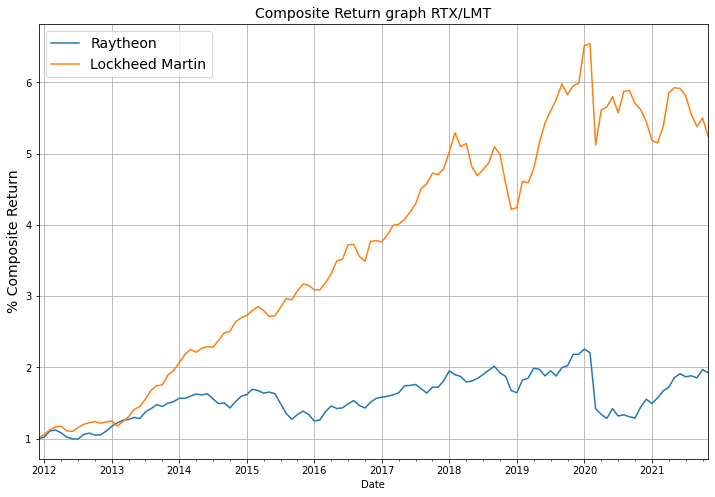

In [13]:
# Plot del grafico dei rendimenti compositi, con i rispettivi titoli LMT/RTX
rendimenti_mil["Rendimenti Compositi Raytheon"].plot(figsize=(12,8), grid=True, label="Raytheon")
rendimenti_mil["Rendimenti Compositi Lockheed Martin"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")

plt.legend(loc="upper left", fontsize=14)
plt.ylabel("% Composite Return", fontsize=14)
plt.title("Composite Return graph RTX/LMT", fontsize=14)
plt.show()

#### Commenti aggiuntivi su titoli militari

Confronto sulle serie storiche di RTX e LMT per identificare una possibile correlazione, creando le seguenti grafiche:
1. Grafico isolato sul prezzo di RTX e LMT
2. Tabella con indice correlazione

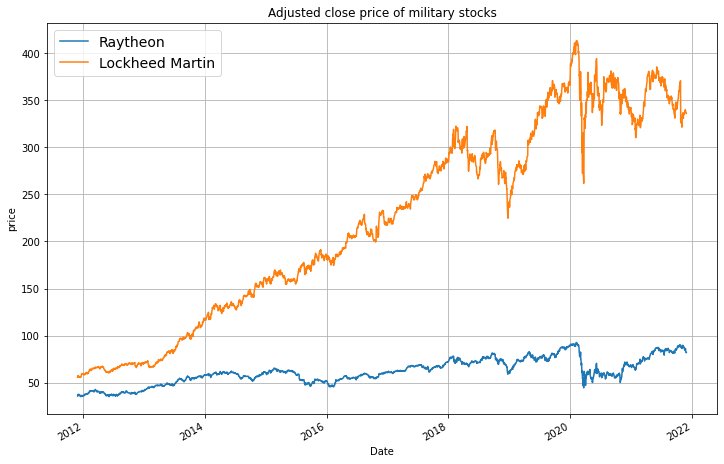

In [14]:
# Creiamo un nuovo dataframe per isolare il prezzo di RTX e LMT
adj_close_mil = pd.DataFrame()

adj_close_mil["Raytheon Price"] = rtx_df[["Adj Close"]]
adj_close_mil["Lockheed Martin Price"] = lmt_df[["Adj Close"]]

adj_close_mil["Raytheon Price"].plot(figsize=(12,8), grid=True, label="Raytheon")
adj_close_mil["Lockheed Martin Price"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")
plt.legend(loc="upper left", fontsize=14)
plt.title("Adjusted close price of military stocks") # titolo del grafico
plt.ylabel("price") # titolo della asse y (non determinato automaticamente)
plt.show()

In [15]:
# Calcoliamo ora la correlazione utilizzando la funzione interna di pandas
adj_close_mil.corr()

,Raytheon Price,Lockheed Martin Price
Raytheon Price,1.000000,0.836831
Lockheed Martin Price,0.836831,1.000000


#### Titoli bancari

Tabella dei rendimenti semplici Netti e Lordi per BAC e JPM

In [16]:
# Raggruppamento dei dati con media
bac_group = bac_df.groupby(pd.Grouper(freq='M')).mean()
jpm_group = jpm_df.groupby(pd.Grouper(freq='M')).mean()

bac_month_returns = bac_group[['Adj Close']]
jpm_month_returns = jpm_group[['Adj Close']]
rendimenti_banc = pd.DataFrame()

# Calcoli dei rendimenti netti e lordi per Bank of America (BAC)
rendimenti_netti_bac = np.log(bac_month_returns/bac_month_returns.shift(1))
rendimenti_lordi_bac = np.log(rendimenti_netti_bac + 1)

# Calcoli dei rendimenti netti e lordi per JPMorgan Chase (JPM)
rendimenti_netti_jpm = np.log(jpm_month_returns/jpm_month_returns.shift(1))
rendimenti_lordi_jpm = np.log(rendimenti_netti_jpm + 1)

rendimenti_banc["Rendimenti Netti Bank of America"] = rendimenti_netti_bac
rendimenti_banc["Rendimenti Lordi Bank of America"] = rendimenti_lordi_bac
rendimenti_banc["Rendimenti Netti JPMorgan Chase"] = rendimenti_netti_jpm
rendimenti_banc["Rendimenti Lordi JPMorgan Chase"] = rendimenti_lordi_jpm
rendimenti_banc = rendimenti_banc.dropna()

rendimenti_banc

,Rendimenti Netti Bank of America,Rendimenti Lordi Bank of America,Rendimenti Netti JPMorgan Chase,Rendimenti Lordi JPMorgan Chase
Date,,,,
2011-12-31,0.038182,0.037471,0.087203,0.083609
2012-01-31,0.214105,0.194007,0.122811,0.115835
2012-02-29,0.162144,0.150267,0.046805,0.045743
2012-03-31,0.121862,0.114989,0.126862,0.119437
2012-04-30,-0.026216,-0.026566,0.014923,0.014813
...,...,...,...,...
2021-07-31,-0.063906,-0.066039,-0.024773,-0.025085
2021-08-31,0.047449,0.046358,0.029489,0.029063
2021-09-30,0.011157,0.011095,0.013406,0.013317


Grafico a Linee dei rendimenti semplici netti

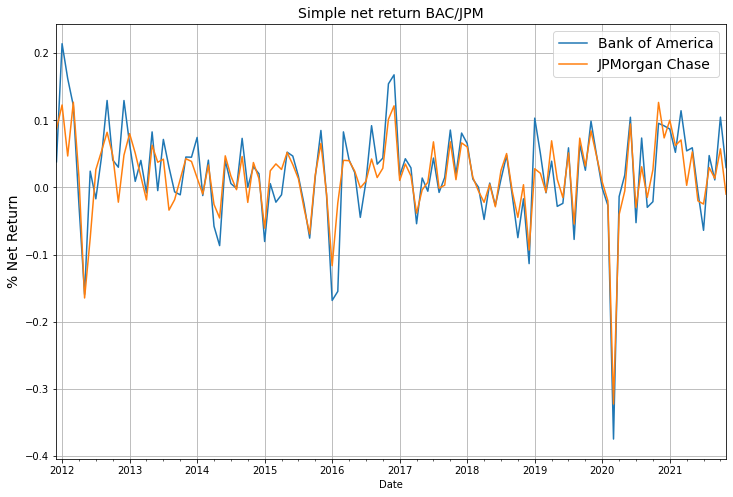

In [17]:
# Plot del grafico con rendimenti netti, utiliziamo plt per indicizzare il grafico
rendimenti_banc["Rendimenti Netti Bank of America"].plot(figsize=(12,8), grid=True, label="Bank of America")
rendimenti_banc["Rendimenti Netti JPMorgan Chase"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")

plt.legend(loc="upper right", fontsize=14)
plt.ylabel("% Net Return", fontsize=14)
plt.title("Simple net return BAC/JPM", fontsize=14)
plt.show()

#### Rendimenti composti
Tabella dei rendimenti composti

In [18]:
# Rendimenti composti per Bank of America (BAC)
cumul_daily_return_bac = (1 + rendimenti_netti_bac).cumprod()
rendimenti_banc["Rendimenti Compositi Bank of America"] = cumul_daily_return_bac

# Rendimenti composti per JPMorgan Chase (JPM)
cumul_daily_return_jpm = (1 + rendimenti_netti_jpm).cumprod()
rendimenti_banc["Rendimenti Compositi JPMorgan Chase"] = cumul_daily_return_jpm

# Costruzione tabella con titoli colonne
rendimenti_banc[["Rendimenti Compositi Bank of America", "Rendimenti Compositi JPMorgan Chase"]]

,Rendimenti Compositi Bank of America,Rendimenti Compositi JPMorgan Chase
Date,,
2011-12-31,1.038182,1.087203
2012-01-31,1.260462,1.220724
2012-02-29,1.464839,1.277859
2012-03-31,1.643346,1.439971
2012-04-30,1.600265,1.461460
...,...,...
2021-07-31,5.974826,5.404686
2021-08-31,6.258327,5.564067
2021-09-30,6.328150,5.638658


Grafico dei rendimenti composti

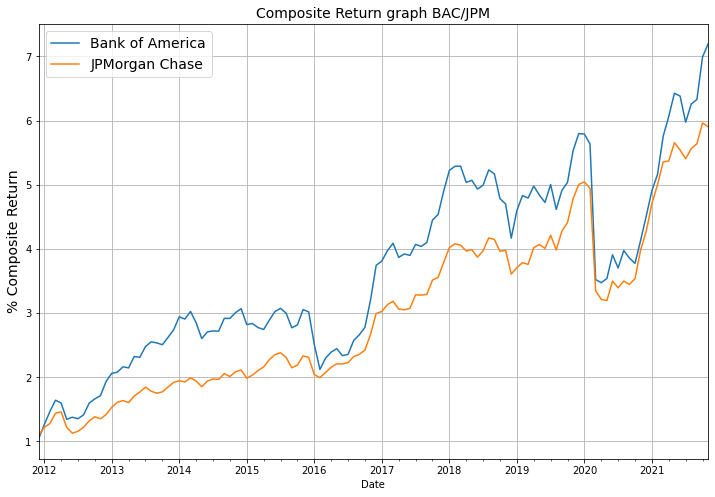

In [19]:
# Plot del grafico dei rendimenti compositi, con i rispettivi titoli BAC/JPM
rendimenti_banc["Rendimenti Compositi Bank of America"].plot(figsize=(12,8), grid=True, label="Bank of America")
rendimenti_banc["Rendimenti Compositi JPMorgan Chase"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")

plt.legend(loc="upper left", fontsize=14)
plt.ylabel("% Composite Return", fontsize=14)
plt.title("Composite Return graph BAC/JPM", fontsize=14)
plt.show()

#### Commenti aggiuntivi su titoli bancari

Confronto sulle serie storiche di BAC e JPM per identificare una possibile correlazione, creando le seguenti grafiche:
1. Grafico isolato sul prezzo di BAC e JPM
2. Tabella con indice correlazione

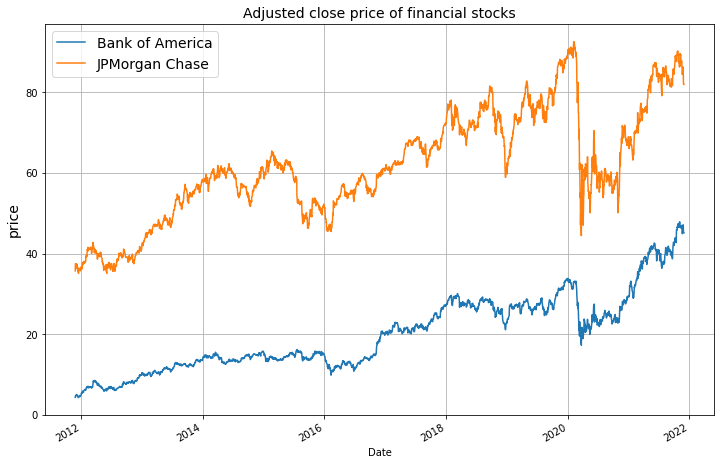

In [20]:
# Creiamo un nuovo dataframe per isolare il prezzo di BAC e JPM
adj_close_banc = pd.DataFrame()

adj_close_banc["Bank of America Price"] = bac_df[["Adj Close"]]
adj_close_banc["JPMorgan Chase Price"] = rtx_df[["Adj Close"]]

adj_close_banc["Bank of America Price"].plot(figsize=(12,8), grid=True, label="Bank of America")
adj_close_banc["JPMorgan Chase Price"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")
plt.legend(loc="upper left", fontsize=14)
plt.title("Adjusted close price of financial stocks", fontsize=14) # titolo del grafico
plt.ylabel("price", fontsize=14) # titolo della asse y (non determinato automaticamente)
plt.show()

In [21]:
# Calcoliamo ora la correlazione utilizzando la funzione interna di pandas
adj_close_banc.corr()

,Bank of America Price,JPMorgan Chase Price
Bank of America Price,1.000000,0.909522
JPMorgan Chase Price,0.909522,1.000000


### 2.2 Istogramma dei rendimenti e dispersione

#### settore tecnologico (FB e GOOG)

Istogramma per ritorno netto

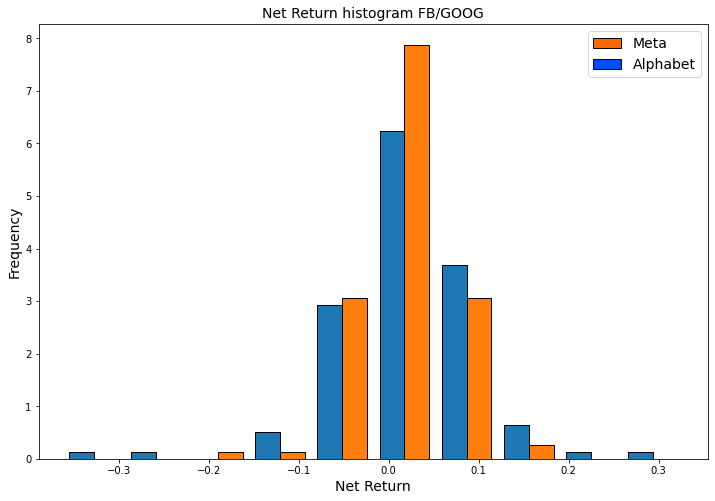

In [22]:
# Plot dell'istogramma dei rendimenti usando sempre matplotlib
from matplotlib.patches import Rectangle # per la legenda ci serve rectangle

cmap = plt.get_cmap('jet')


plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
plt.hist(rendimenti_tecno[["Rendimenti Netti Meta", "Rendimenti Netti Alphabet"]], density=True, edgecolor='black')
plt.title("Net Return histogram FB/GOOG", fontsize=14)
t_labels=["Meta", "Alphabet"] # Nomi degli stock nella legenda
t_handles=[Rectangle((0,0),1,1,color=cmap(0.8),ec="k"), Rectangle((0,0),1,1,color=cmap(0.2),ec="k")]
plt.legend(t_handles, t_labels, loc='upper right', fontsize=14) # Creazione legenda con posizione alto a dx
plt.xlabel("Net Return", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()

#### Dispersione rendimenti (FB e GOOG)

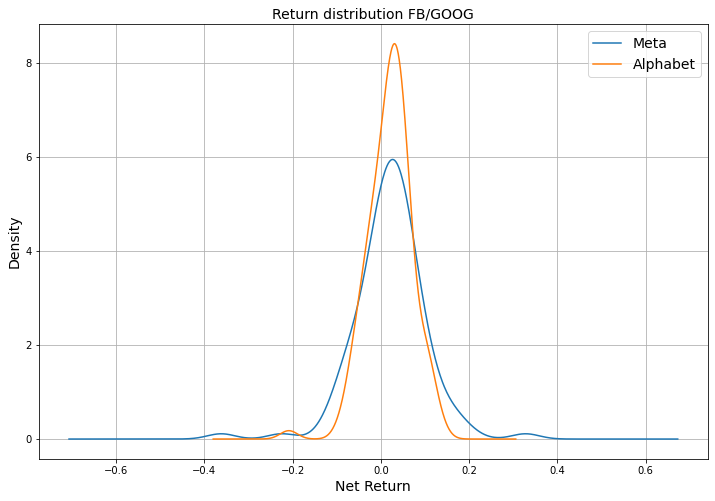

Deviazione Standard


Rendimenti Netti Meta        0.080678
Rendimenti Netti Alphabet    0.050795
dtype: float64

In [23]:
# Plot della dispersione dei rendimenti
rendimenti_tecno["Rendimenti Netti Meta"].plot.density(label="Meta", grid=True, figsize=(12,8),)
rendimenti_tecno["Rendimenti Netti Alphabet"].plot.density(label="Alphabet", grid=True, figsize=(12,8),)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Net Return", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Return distribution FB/GOOG", fontsize=14)


plt.show()

# Stampiamo la deviazione standard per entrambi i titoli
print("Deviazione Standard")
rendimenti_tecno[["Rendimenti Netti Meta", "Rendimenti Netti Alphabet"]].std()

#### settore militare (RTX e LMT)

Istogramma per ritorno netto su RTX e LMT

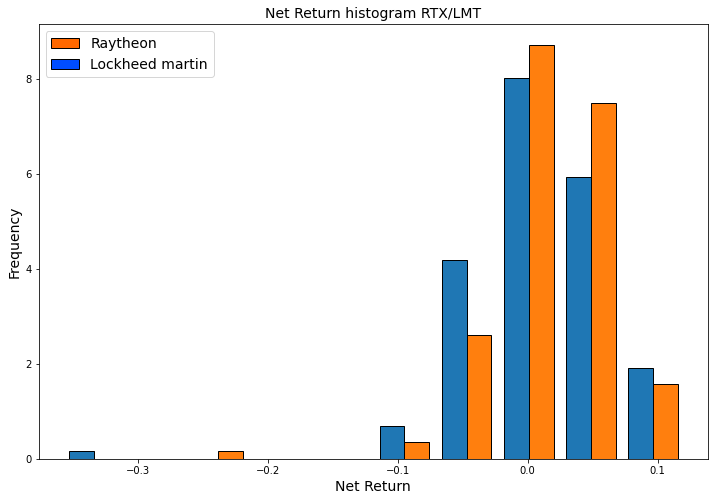

In [24]:
# Plot dell'istogramma dei rendimenti usando sempre matplotlib per RTX e LMT
cmap = plt.get_cmap('jet')


plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
plt.hist(rendimenti_mil[["Rendimenti Netti Raytheon", "Rendimenti Netti Lockheed Martin"]], density=True, edgecolor='black')
plt.title("Net Return histogram RTX/LMT", fontsize=14)
t_labels=["Raytheon", "Lockheed martin"] # Nomi degli stock nella legenda
t_handles=[Rectangle((0,0),1,1,color=cmap(0.8),ec="k"), Rectangle((0,0),1,1,color=cmap(0.2),ec="k")]
plt.legend(t_handles, t_labels, loc='upper left', fontsize=14) # Creazione legenda con posizione alto a dx
plt.xlabel("Net Return", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()

#### Dispersione rendimenti (RTX e LMT)

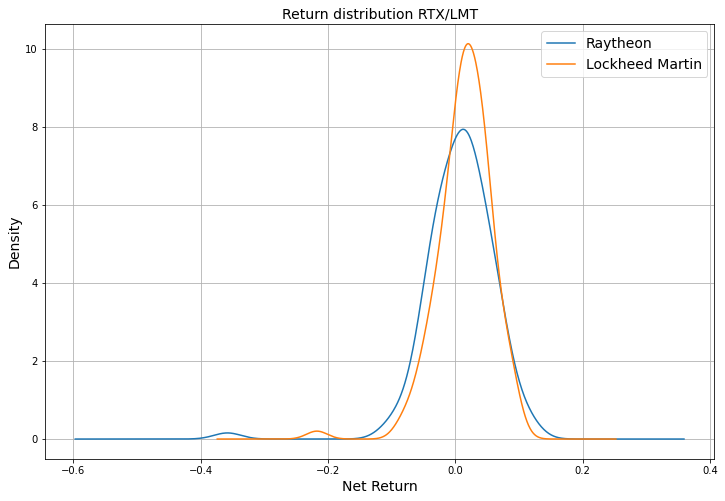

Deviazione Standard


Rendimenti Netti Raytheon           0.055370
Rendimenti Netti Lockheed Martin    0.042682
dtype: float64

In [25]:
# Plot della dispersione dei rendimenti per titoli militari
rendimenti_mil["Rendimenti Netti Raytheon"].plot.density(label="Raytheon", grid=True, figsize=(12,8),)
rendimenti_mil["Rendimenti Netti Lockheed Martin"].plot.density(label="Lockheed Martin", grid=True, figsize=(12,8),)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Net Return", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Return distribution RTX/LMT", fontsize=14)


plt.show()

# Stampiamo la deviazione standard per entrambi i titoli
print("Deviazione Standard")
rendimenti_mil[["Rendimenti Netti Raytheon", "Rendimenti Netti Lockheed Martin"]].std()

#### settore militare (RTX e LMT)

Istogramma per ritorno netto su BAC e JPM

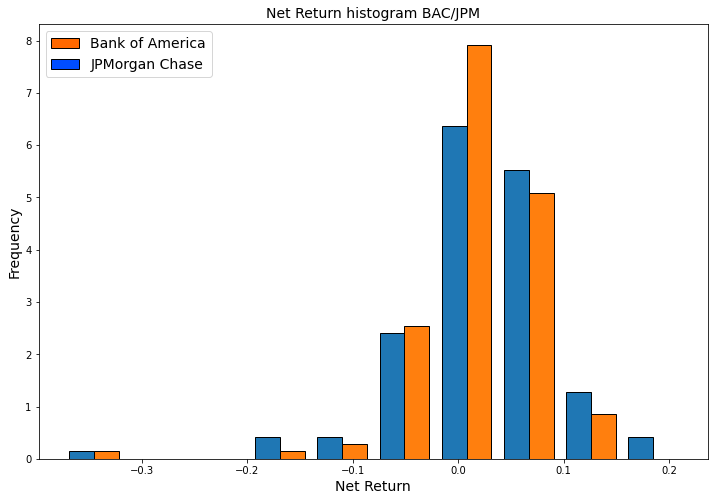

In [26]:
# Plot dell'istogramma dei rendimenti usando sempre matplotlib per BAC e JPM
cmap = plt.get_cmap('jet')


plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
plt.hist(rendimenti_banc[["Rendimenti Netti Bank of America", "Rendimenti Netti JPMorgan Chase"]], density=True, edgecolor='black')
plt.title("Net Return histogram BAC/JPM", fontsize=14)
t_labels=["Bank of America", "JPMorgan Chase"] # Nomi degli stock nella legenda
t_handles=[Rectangle((0,0),1,1,color=cmap(0.8),ec="k"), Rectangle((0,0),1,1,color=cmap(0.2),ec="k")]
plt.legend(t_handles, t_labels, loc='upper left', fontsize=14) # Creazione legenda con posizione alto a dx
plt.xlabel("Net Return", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()

#### Dispersione rendimenti (BAC e JPM)

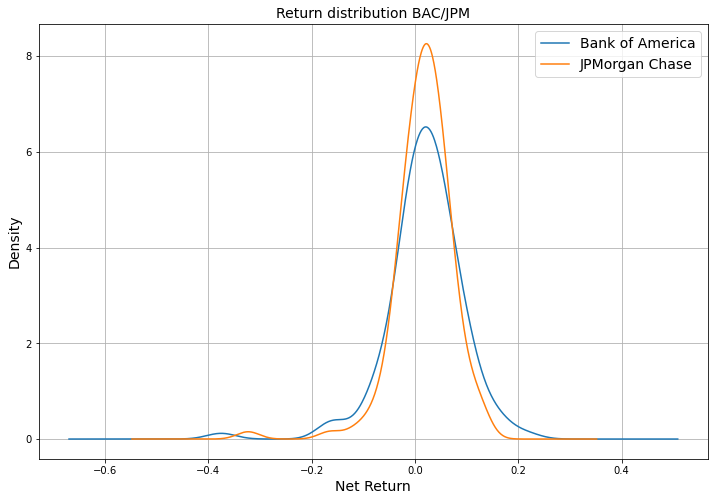

Deviazione Standard


Rendimenti Netti Bank of America    0.072910
Rendimenti Netti JPMorgan Chase     0.056944
dtype: float64

In [27]:
# Plot della dispersione dei rendimenti per titoli militari
rendimenti_banc["Rendimenti Netti Bank of America"].plot.density(label="Bank of America", grid=True, figsize=(12,8),)
rendimenti_banc["Rendimenti Netti JPMorgan Chase"].plot.density(label="JPMorgan Chase", grid=True, figsize=(12,8),)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Net Return", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Return distribution BAC/JPM", fontsize=14)


plt.show()

# Stampiamo la deviazione standard per entrambi i titoli
print("Deviazione Standard")
rendimenti_banc[["Rendimenti Netti Bank of America", "Rendimenti Netti JPMorgan Chase"]].std()

### 2.3 Grafici Diagnostici a 4 sezioni

I grafici richiesti per questa sezione per ogni titolo considerato sono:
- istogramma
- kernel density
- boxplot
- qq-plot

Iniziamo con **Meta (FB)**

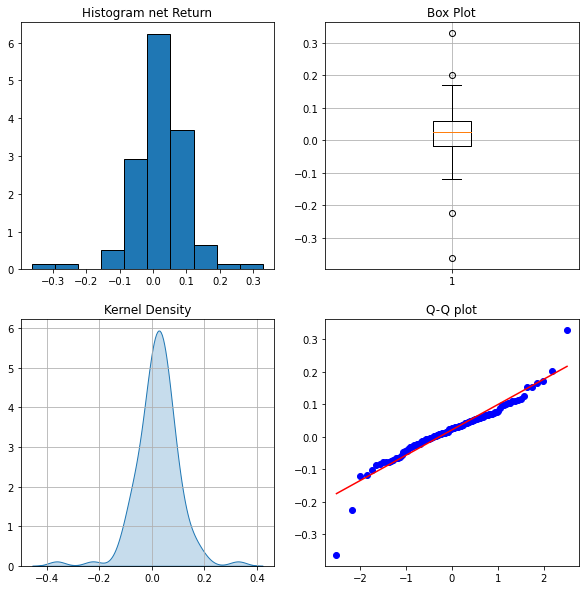

In [28]:
# Effettuiamo per la prima volta il plot di 3 grafici nella stessa immagine
from scipy import stats # importiamo stats dalla libreria scipy

rendimenti_netti_fb = rendimenti_netti_fb.dropna() # drop delle righe vuote (meta quotata solo da 2012)

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_fb["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_fb["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_fb["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_fb["Adj Close"],dist='norm',plot=plt)
plt.title("Q-Q plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()

Ora per **Alphabet (GOOG)**

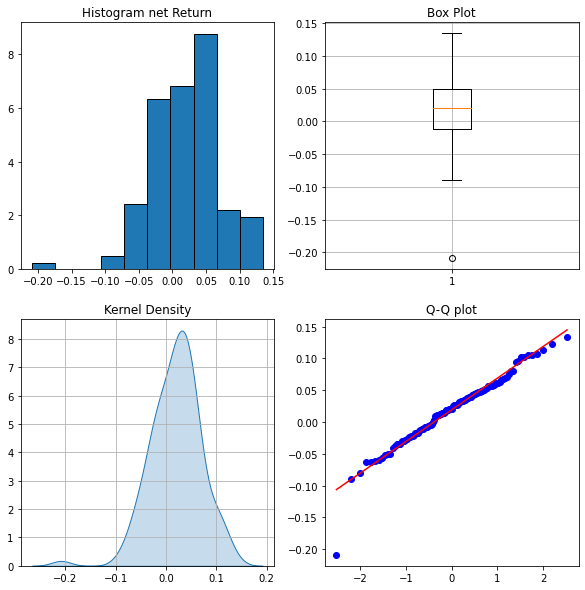

In [29]:
# Plot dei grafici diagnostici per Alphabet
rendimenti_netti_goog = rendimenti_netti_goog.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_goog["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_goog["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_goog["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_goog["Adj Close"],dist='norm',plot=plt)
plt.title("Q-Q plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()

Per **Raytheon (RTX)**

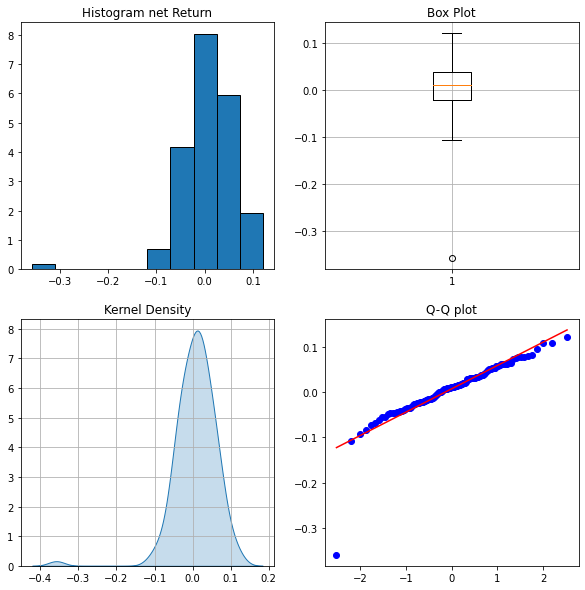

In [30]:
# Plot dei grafici diagnostici per Raytheon
rendimenti_netti_rtx = rendimenti_netti_rtx.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_rtx["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_rtx["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_rtx["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_rtx["Adj Close"],dist='norm',plot=plt)
plt.title("Q-Q plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()

Per **Lockheed Martin (LMT)**

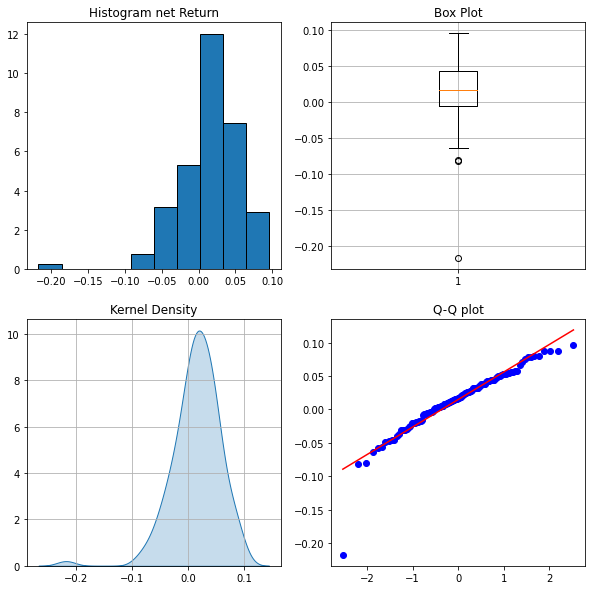

In [31]:
# Plot dei grafici diagnostici per Lockheed Martin
rendimenti_netti_lmt = rendimenti_netti_lmt.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_lmt["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_lmt["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_lmt["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_lmt["Adj Close"],dist='norm',plot=plt)
plt.title("Q-Q plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()

Per **Bank of America (BAC)**

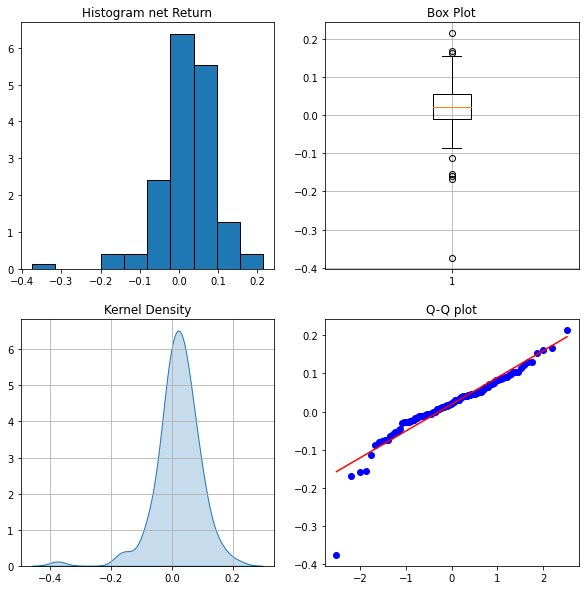

In [32]:
# Plot dei grafici diagnostici per Bank of America
rendimenti_netti_bac = rendimenti_netti_bac.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_bac["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_bac["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_bac["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_bac["Adj Close"],dist='norm',plot=plt)
plt.title("Q-Q plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()

Per **JPMorgan Chase (JPM)**

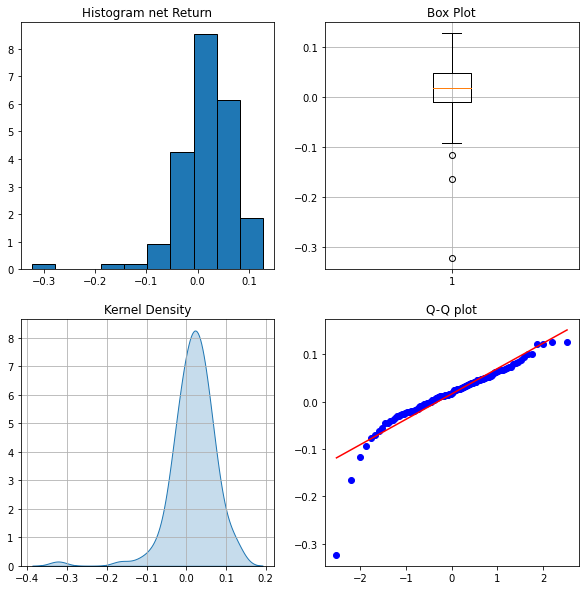

In [33]:
# Plot dei grafici diagnostici per JPMorgan Chase
rendimenti_netti_jpm = rendimenti_netti_jpm.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_jpm["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_jpm["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_jpm["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_jpm["Adj Close"],dist='norm',plot=plt)
plt.title("Q-Q plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()

### 2.4 Statistiche descrittive univariate

Calcolo delle seguenti statistiche per ogni titolo:
- **Media**
- **Varianza**
- **Deviazione Standard**
- **Asimmetria**
- **Curtosi**

Inoltre determinare la evoluzione nel tempo per ogni titolo e la sua volatilità

#### Calcolo statistiche per Meta (FB)

In [34]:
# Calcolo di tutte le statistiche richieste per Meta (FB)
statistiche_fb = pd.DataFrame() # Creriamo un nuovo dataframe

# Assegnamo ad ogni elem del dataset la sua statistica di riferimento 
# (usiamo pandas per effettuare i calcoli statistici)
statistiche_fb["Media"] = round(rendimenti_netti_fb.mean(), 4)
statistiche_fb["Varianza"] = round(rendimenti_netti_fb.var(), 4)
statistiche_fb["Deviazione Standard"] = round(rendimenti_netti_fb.std(), 4)
statistiche_fb["Asimmetria"] = round(rendimenti_netti_fb.skew(), 4)
statistiche_fb["Curtosi"] = round(rendimenti_netti_fb.kurtosis(), 4)

print("Statistiche per Meta (FB)")
statistiche_fb # Print della tabella

Statistiche per Meta (FB)


,Media,Varianza,Deviazione Standard,Asimmetria,Curtosi
Adj Close,0.0207,0.0065,0.0807,-0.5917,5.5871


Evoluzione nel tempo e volatilità per Meta


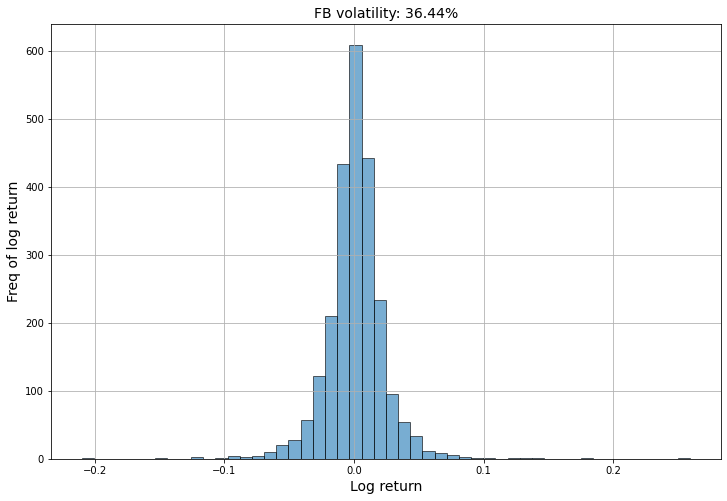

In [35]:
# Calcolo della volatilità per Meta (FB)
fb_daily_returns = fb_df[['Adj Close']]
rendimenti_netti_fb = np.log(fb_daily_returns['Adj Close']/fb_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_fb.std()*252**.5
str_vol = str(round(volatility, 4)*100)

plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
rendimenti_netti_fb.hist(bins=50, alpha=0.6, edgecolor='black')

plt.xlabel("Log return", fontsize=14)
plt.ylabel("Freq of log return", fontsize=14)
plt.title("FB volatility: " + str_vol + "%", fontsize=14)

print("Evoluzione nel tempo e volatilità per Meta")
plt.show()

#### Calcolo statistiche per Alphabet (GOOG)

In [36]:
# Calcolo di tutte le statistiche richieste per Alphabet (GOOG)
statistiche_goog = pd.DataFrame() # Creriamo un nuovo dataframe

statistiche_goog["Media"] = round(rendimenti_netti_goog.mean(), 4)
statistiche_goog["Varianza"] = round(rendimenti_netti_goog.var(), 4)
statistiche_goog["Deviazione Standard"] = round(rendimenti_netti_goog.std(), 4)
statistiche_goog["Asimmetria"] = round(rendimenti_netti_goog.skew(), 4)
statistiche_goog["Curtosi"] = round(rendimenti_netti_goog.kurtosis(), 4)

print("Statistiche per Alphabet (GOOG)")
statistiche_goog # Print della tabella

Statistiche per Alphabet (GOOG)


,Media,Varianza,Deviazione Standard,Asimmetria,Curtosi
Adj Close,0.0192,0.0025,0.0501,-0.6988,2.6747


Evoluzione nel tempo e volatilità per Alphabet


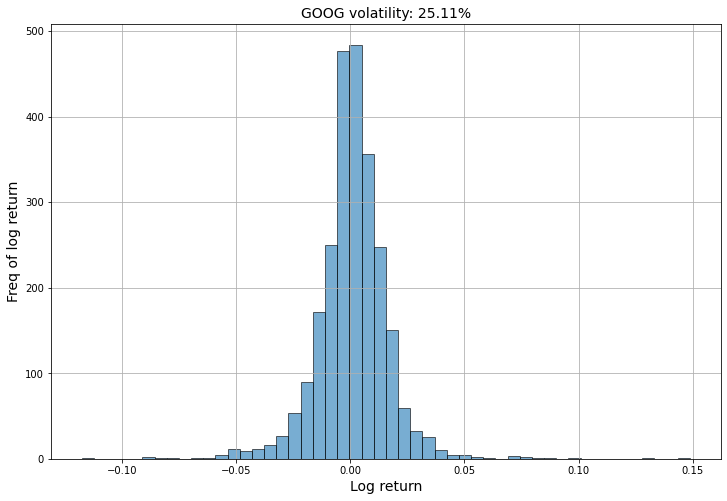

In [37]:
# Calcolo della volatilità per Alphabet (GOOG)
goog_daily_returns = goog_df[['Adj Close']]
rendimenti_netti_goog = np.log(goog_daily_returns['Adj Close']/goog_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_goog.std()*252**.5
str_vol = str(round(volatility, 4)*100)

plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
rendimenti_netti_goog.hist(bins=50, alpha=0.6, edgecolor='black')

plt.xlabel("Log return", fontsize=14)
plt.ylabel("Freq of log return", fontsize=14)
plt.title("GOOG volatility: " + str_vol + "%", fontsize=14)

print("Evoluzione nel tempo e volatilità per Alphabet")
plt.show()

#### Calcolo statistiche per Raytheon (RTX)

In [38]:
# Calcolo di tutte le statistiche richieste per Raytheon (RTX)
statistiche_rtx = pd.DataFrame() # Creriamo un nuovo dataframe

statistiche_rtx["Media"] = round(rendimenti_netti_rtx.mean(), 4)
statistiche_rtx["Varianza"] = round(rendimenti_netti_rtx.var(), 4)
statistiche_rtx["Deviazione Standard"] = round(rendimenti_netti_rtx.std(), 4)
statistiche_rtx["Asimmetria"] = round(rendimenti_netti_rtx.skew(), 4)
statistiche_rtx["Curtosi"] = round(rendimenti_netti_rtx.kurtosis(), 4)

print("Statistiche per Raytheon (RTX)")
statistiche_rtx # Print della tabella

Statistiche per Raytheon (RTX)


,Media,Varianza,Deviazione Standard,Asimmetria,Curtosi
Adj Close,0.0072,0.0031,0.0554,-2.3533,14.7837


Evoluzione nel tempo e volatilità per Raytheon


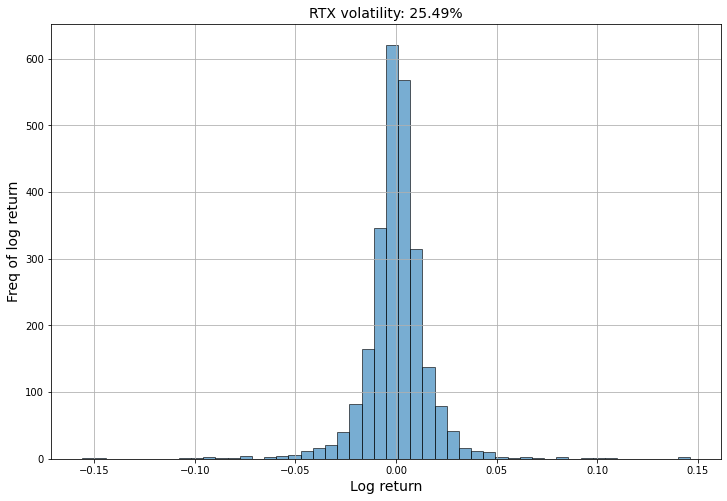

In [39]:
# Calcolo della volatilità per Raytheon (RTX)
rtx_daily_returns = rtx_df[['Adj Close']]
rendimenti_netti_rtx = np.log(rtx_daily_returns['Adj Close']/rtx_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_rtx.std()*252**.5
str_vol = str(round(volatility*100, 2))

plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
rendimenti_netti_rtx.hist(bins=50, alpha=0.6, edgecolor='black')

plt.xlabel("Log return", fontsize=14)
plt.ylabel("Freq of log return", fontsize=14)
plt.title("RTX volatility: " + str_vol + "%", fontsize=14)

print("Evoluzione nel tempo e volatilità per Raytheon")
plt.show()

#### Calcolo statistiche per Lockheed Martin (LMT)

In [40]:
# Calcolo di tutte le statistiche richieste per Lockheed Martin (LMT)
statistiche_lmt = pd.DataFrame() # Creiamo un nuovo dataframe

statistiche_lmt["Media"] = round(rendimenti_netti_lmt.mean(), 4)
statistiche_lmt["Varianza"] = round(rendimenti_netti_lmt.var(), 4)
statistiche_lmt["Deviazione Standard"] = round(rendimenti_netti_lmt.std(), 4)
statistiche_lmt["Asimmetria"] = round(rendimenti_netti_lmt.skew(), 4)
statistiche_lmt["Curtosi"] = round(rendimenti_netti_lmt.kurtosis(), 4)

print("Statistiche per Lockheed Martin (LMT)")
statistiche_lmt # Print della tabella

Statistiche per Lockheed Martin (LMT)


,Media,Varianza,Deviazione Standard,Asimmetria,Curtosi
Adj Close,0.0148,0.0018,0.0427,-1.4478,6.3315


Evoluzione nel tempo e volatilità per Lockheed Martin


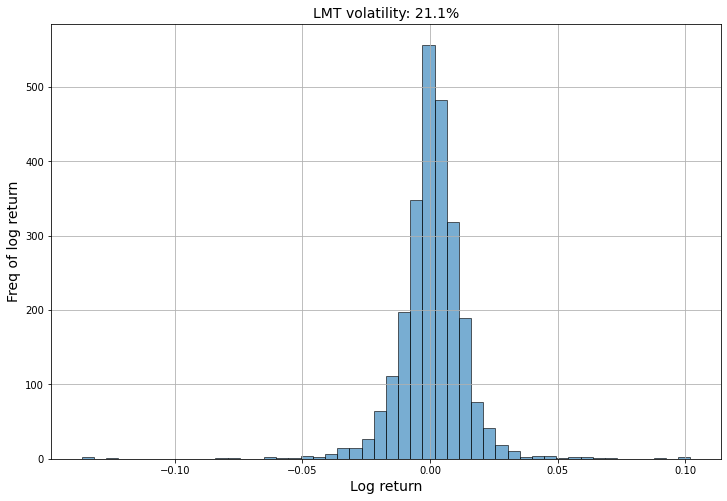

In [41]:
# Calcolo della volatilità per Lockheed Martin (LMT)
lmt_daily_returns = lmt_df[['Adj Close']]
rendimenti_netti_lmt = np.log(lmt_daily_returns['Adj Close']/lmt_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_lmt.std()*252**.5
str_vol = str(round(volatility*100, 2))

plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
rendimenti_netti_lmt.hist(bins=50, alpha=0.6, edgecolor='black')

plt.xlabel("Log return", fontsize=14)
plt.ylabel("Freq of log return", fontsize=14)
plt.title("LMT volatility: " + str_vol + "%", fontsize=14)

print("Evoluzione nel tempo e volatilità per Lockheed Martin")
plt.show()

#### Calcolo statistiche per Bank of America (BAC)

In [42]:
# Calcolo di tutte le statistiche richieste per Bank of America (BAC)
statistiche_bac = pd.DataFrame() # Creriamo un nuovo dataframe

statistiche_bac["Media"] = round(rendimenti_netti_bac.mean(), 4)
statistiche_bac["Varianza"] = round(rendimenti_netti_bac.var(), 4)
statistiche_bac["Deviazione Standard"] = round(rendimenti_netti_bac.std(), 4)
statistiche_bac["Asimmetria"] = round(rendimenti_netti_bac.skew(), 4)
statistiche_bac["Curtosi"] = round(rendimenti_netti_bac.kurtosis(), 4)

print("Statistiche per Bank of America (BAC)")
statistiche_bac # Print della tabella

Statistiche per Bank of America (BAC)


,Media,Varianza,Deviazione Standard,Asimmetria,Curtosi
Adj Close,0.0194,0.0053,0.0729,-1.3789,6.9176


Evoluzione nel tempo e volatilità per Bank of America


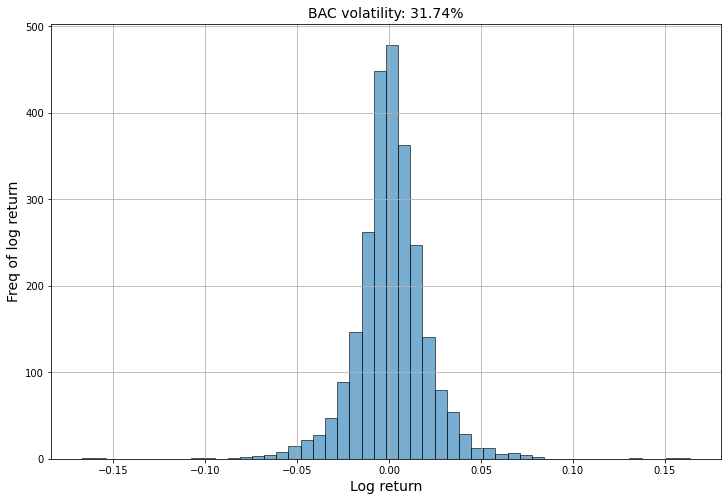

In [43]:
# Calcolo della volatilità per Bank of America (BAC)
bac_daily_returns = bac_df[['Adj Close']]
rendimenti_netti_bac = np.log(bac_daily_returns['Adj Close']/bac_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_bac.std()*252**.5
str_vol = str(round(volatility*100, 2))

plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
rendimenti_netti_bac.hist(bins=50, alpha=0.6, edgecolor='black')

plt.xlabel("Log return", fontsize=14)
plt.ylabel("Freq of log return", fontsize=14)
plt.title("BAC volatility: " + str_vol + "%", fontsize=14)

print("Evoluzione nel tempo e volatilità per Bank of America")
plt.show()

#### Calcolo statistiche per JPMorgan Chase (JPM)

In [44]:
# Calcolo di tutte le statistiche richieste per JPMorgan Chase (JPM)
statistiche_jpm = pd.DataFrame() # Creriamo un nuovo dataframe

statistiche_jpm["Media"] = round(rendimenti_netti_jpm.mean(), 4)
statistiche_jpm["Varianza"] = round(rendimenti_netti_jpm.var(), 4)
statistiche_jpm["Deviazione Standard"] = round(rendimenti_netti_jpm.std(), 4)
statistiche_jpm["Asimmetria"] = round(rendimenti_netti_jpm.skew(), 4)
statistiche_jpm["Curtosi"] = round(rendimenti_netti_jpm.kurtosis(), 4)

print("Statistiche per JPMorgan Chase (JPM)")
statistiche_jpm # Print della tabella

Statistiche per JPMorgan Chase (JPM)


,Media,Varianza,Deviazione Standard,Asimmetria,Curtosi
Adj Close,0.0166,0.0032,0.0569,-1.9897,10.3171


Evoluzione nel tempo e volatilità per JPMorgan Chase


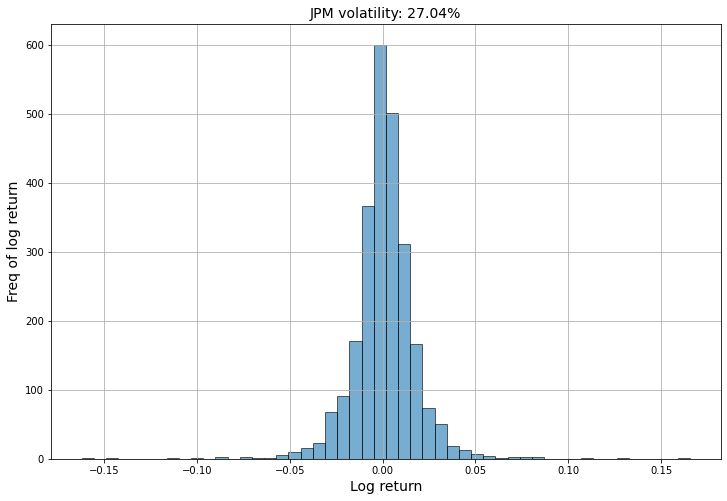

In [45]:
# Calcolo della volatilità per JPMorgan Chase (JPM)
jpm_daily_returns = jpm_df[['Adj Close']]
rendimenti_netti_jpm = np.log(jpm_daily_returns['Adj Close']/jpm_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_jpm.std()*252**.5
str_vol = str(round(volatility*100, 2))

plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
rendimenti_netti_jpm.hist(bins=50, alpha=0.6, edgecolor='black')

plt.xlabel("Log return", fontsize=14)
plt.ylabel("Freq of log return", fontsize=14)
plt.title("JPM volatility: " + str_vol + "%", fontsize=14)

print("Evoluzione nel tempo e volatilità per JPMorgan Chase")
plt.show()

### 2.5 Matrice di varianze/covarianze dei rendimenti

Per relazionare i diversi titoli e trovare il più rischioso

In [46]:
# Matrice di Varianze/Covarianze di tutti i titoli
returns = 100 * df_merged['Adj Close'].pct_change().dropna()

returns.cov() # Caloliamo la covariazna

,BAC,FB,GOOG,JPM,LMT,RTX
BAC,3.822653,1.275829,1.315322,2.887409,1.123327,1.861807
FB,1.275829,5.347862,1.843259,1.093736,0.780299,0.956870
GOOG,1.315322,1.843259,2.536485,1.147189,0.775151,1.099412
JPM,2.887409,1.093736,1.147189,2.790344,1.057372,1.725901
LMT,1.123327,0.780299,0.775151,1.057372,1.799856,1.207929
RTX,1.861807,0.956870,1.099412,1.725901,1.207929,2.616264


### 2.6 Matrice di correlazione dei rendimenti

In [47]:
# Matrice di correlazione sui rendimenti
# utilizziamo la matrice creata al blocco precedente e invochiamo la funzione di pandas corr
returns.corr()

,BAC,FB,GOOG,JPM,LMT,RTX
BAC,1.000000,0.282176,0.422409,0.884091,0.428257,0.588724
FB,0.282176,1.000000,0.500472,0.283135,0.251508,0.255813
GOOG,0.422409,0.500472,1.000000,0.431211,0.362787,0.426780
JPM,0.884091,0.283135,0.431211,1.000000,0.471824,0.638772
LMT,0.428257,0.251508,0.362787,0.471824,1.000000,0.556650
RTX,0.588724,0.255813,0.426780,0.638772,0.556650,1.000000


### 2.7 Grafico dell'anadamento nel tempo delle correlazioni tra i titoli e scatter plots

#### Per i titoli tecnologici (FB/GOOG)

In [48]:
# Lavoriamo solo con i titoli tecnologici
tecno_df_monthly = tecno_df.groupby(pd.Grouper(freq='M')).mean() # Otteniamo i dati mensili

l_tecno_df = tecno_df['Adj Close']
tecno_returns = l_tecno_df.pct_change().dropna()

tecno_df_monthly = tecno_df_monthly['Adj Close']
tecno_returns_monthly = tecno_df_monthly.pct_change().dropna()

print("Ritorni logaritmici mensili (ultimo anno) per i titoli tecnologici")

tecno_returns_monthly.loc['2020-01-01':'2021-01-01']

Ritorni logaritmici mensili (ultimo anno) per i titoli tecnologici


,FB,GOOG
Date,,
2020-01-31,0.072747,0.071436
2020-02-29,-0.042180,0.019112
2020-03-31,-0.201236,-0.188317
2020-04-30,0.067908,0.038494
2020-05-31,0.223418,0.119090
2020-06-30,0.071565,0.036155
2020-07-31,0.030879,0.057668
2020-08-31,0.123631,0.021388
2020-09-30,-0.008311,-0.017718


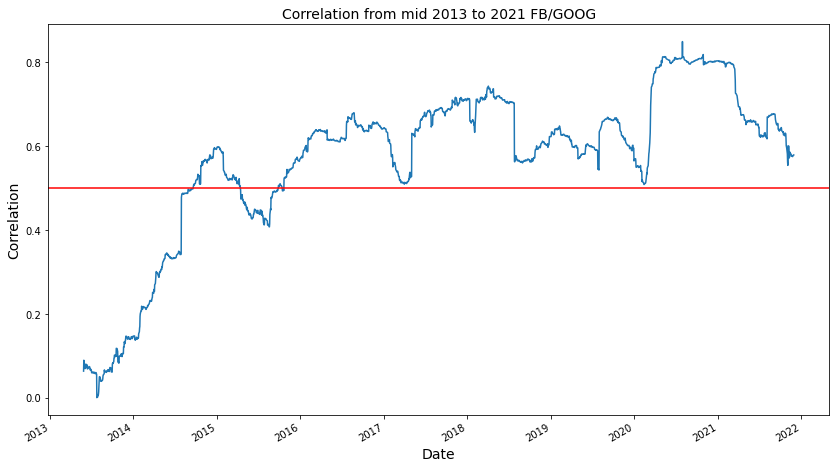

In [49]:
# Plot della correlazione nel tempo
cor = tecno_returns['FB'].rolling(255).corr(tecno_returns['GOOG']).plot(figsize=(14, 8))
cor.axhline(tecno_returns.corr().iloc[0,1], c='r')
plt.ylabel("Correlation", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.title("Correlation from mid 2013 to 2021 FB/GOOG", fontsize=14)

plt.show()

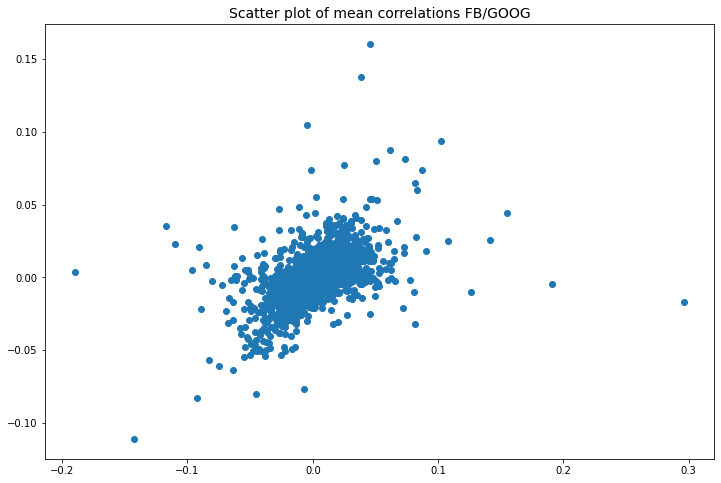

In [50]:
# Scatter plot (dispersione) delle correlazioni medie su titoli tecnologici
plt.figure(figsize=(12,8))
plt.scatter(tecno_returns['FB'],tecno_returns['GOOG'])
plt.title("Scatter plot of mean correlations FB/GOOG", fontsize=14)

plt.show()

#### Per i titoli militari (RTX/LMT)

In [51]:
# Lavoriamo solo con i titoli militari
mil_df_monthly = mil_df.groupby(pd.Grouper(freq='M')).mean() # Otteniamo i dati mensili

l_mil_df = mil_df['Adj Close']
mil_returns = l_mil_df.pct_change().dropna()

mil_df_monthly = mil_df_monthly['Adj Close']
mil_returns_monthly = mil_df_monthly.pct_change().dropna()

print("Ritorni logaritmici mensili (ultimo anno) per i titoli militari nel 2017")

mil_returns_monthly.loc['2017-01-01':'2018-01-01']

Ritorni logaritmici mensili (ultimo anno) per i titoli militari nel 2017


,LMT,RTX
Date,,
2017-01-31,-0.004217,0.011036
2017-02-28,0.026029,0.008094
2017-03-31,0.035454,0.012663
2017-04-30,0.004365,0.017049
2017-05-31,0.015709,0.061372
2017-06-30,0.026246,0.004578
2017-07-31,0.027679,0.006915
2017-08-31,0.052032,-0.033448
2017-09-30,0.015584,-0.034925


In [52]:
# Stampa dei ritorni log nel 2020
print("Ritorni logaritmici mensili (ultimo anno) per i titoli militari nel 2020")

mil_returns_monthly.loc['2020-01-01':'2021-01-01']

Ritorni logaritmici mensili (ultimo anno) per i titoli militari nel 2020


,LMT,RTX
Date,,
2020-01-31,0.092100,0.033832
2020-02-29,0.004386,-0.021824
2020-03-31,-0.195262,-0.300745
2020-04-30,0.100500,-0.053140
2020-05-31,0.007897,-0.041125
2020-06-30,0.025524,0.113340
2020-07-31,-0.038608,-0.070383
2020-08-31,0.055741,0.012215
2020-09-30,0.002273,-0.019823


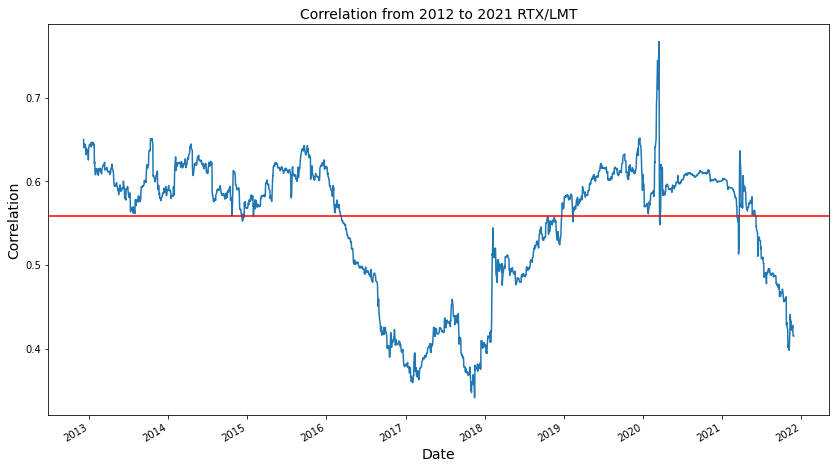

In [53]:
# Plot della correlazione nel tempo
cor = mil_returns['RTX'].rolling(255).corr(mil_returns['LMT']).plot(figsize=(14, 8))
cor.axhline(mil_returns.corr().iloc[0,1], c='r')
plt.ylabel("Correlation", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.title("Correlation from 2012 to 2021 RTX/LMT", fontsize=14)

plt.show()

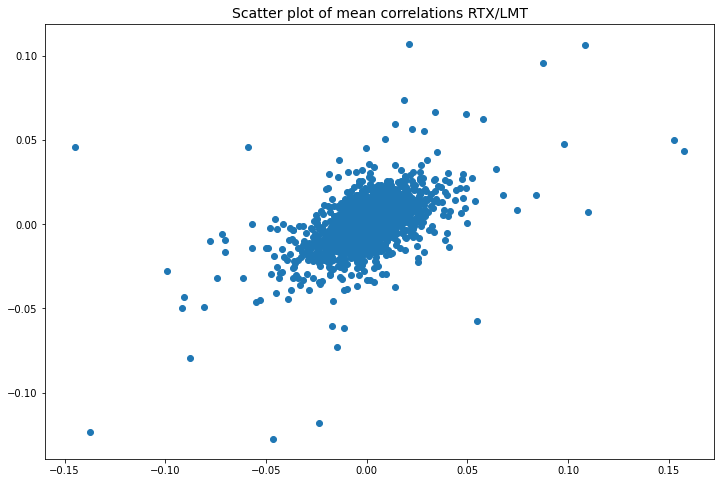

In [54]:
# Scatter plot (dispersione) delle correlazioni medie su titoli militari
plt.figure(figsize=(12,8))
plt.scatter(mil_returns['RTX'],mil_returns['LMT'])
plt.title("Scatter plot of mean correlations RTX/LMT", fontsize=14)

plt.show()

#### Per i titoli bancari (BAC/JPM)

In [55]:
# Lavoriamo solo con i titoli bancari
banc_df_monthly = banc_df.groupby(pd.Grouper(freq='M')).mean() # Otteniamo i dati mensili

l_banc_df = banc_df['Adj Close']
banc_returns = l_banc_df.pct_change().dropna()

banc_df_monthly = banc_df_monthly['Adj Close']
banc_returns_monthly = banc_df_monthly.pct_change().dropna()

print("Ritorni logaritmici mensili (ultimo anno) per i titoli bancari")

banc_returns_monthly.loc['2020-01-01':'2021-01-01']

Ritorni logaritmici mensili (ultimo anno) per i titoli bancari


,BAC,JPM
Date,,
2020-01-31,-0.001261,0.008060
2020-02-29,-0.026479,-0.019927
2020-03-31,-0.312586,-0.275772
2020-04-30,-0.013475,-0.039523
2020-05-31,0.018518,-0.005196
2020-06-30,0.110186,0.099117
2020-07-31,-0.051169,-0.029457
2020-08-31,0.076336,0.031229
2020-09-30,-0.029254,-0.014791


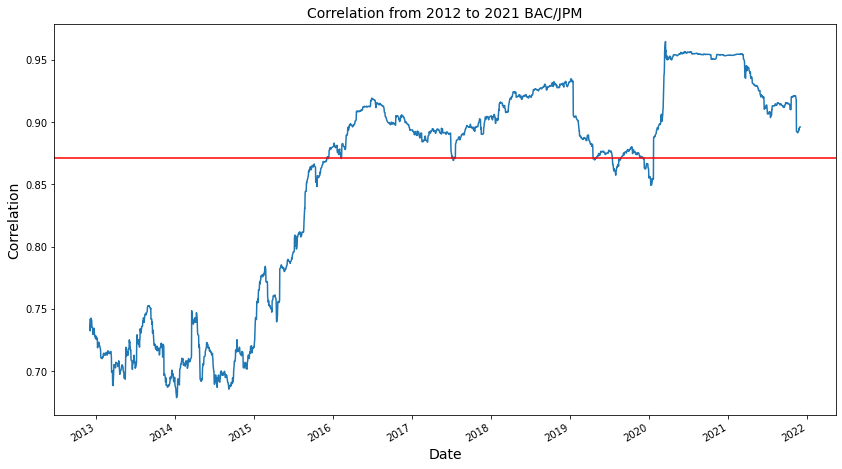

In [56]:
# Plot della correlazione nel tempo
cor = banc_returns['BAC'].rolling(255).corr(banc_returns['JPM']).plot(figsize=(14, 8))
cor.axhline(banc_returns.corr().iloc[0,1], c='r')
plt.ylabel("Correlation", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.title("Correlation from 2012 to 2021 BAC/JPM", fontsize=14)

plt.show()

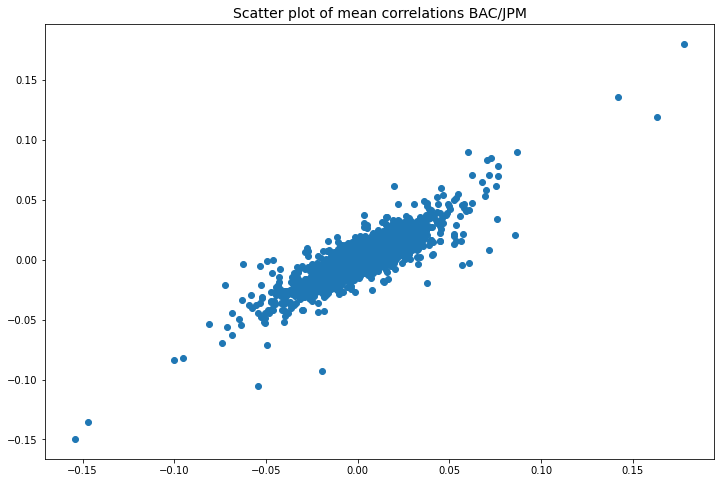

In [57]:
# Scatter plot (dispersione) delle correlazioni medie su titoli bancari
plt.figure(figsize=(12,8))
plt.scatter(banc_returns['BAC'],banc_returns['JPM'])
plt.title("Scatter plot of mean correlations BAC/JPM", fontsize=14)

plt.show()

## 3. Analisi di previsione

Per la analisi di previsione è stato utilizzato il modello statistico **ARIMA**.

In quanto trovare i 3 parametri di ARIMA è una operazione non semplice, è stata utilizzata una libreria molto utile
chiamata pmdarima, per ogni titolo utilizziamo pmdarima per torvare il valore dei parametri migliore.

### 3.1 Previsione di Meta

In [58]:
# Importiamo tutte le librerie necessarie per effettuare la previsione (tra cui ARIMA)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs

# Scarichiamo il training set - 80 mesi
fb_t_df = yf.download('FB', start='2011-11-30', end='2018-07-30', adjusted=True, progress=False)

# Resample di facebook per frequenza settimanale (periodo 2012-2021)
tr_fb = fb_t_df.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

# Utiliziamo auto_arima per trovare la combinazione ideale dei parametri
# Non utilizziamo la modalità stepwise in quanto senza abbiamo un risultato leggermente migliore in base
# al valore AIC.
fb_model = pm.auto_arima(tr_fb,
                         error_action='ignore',
                         suppress_warnings=True,
                         seasonal=False,
                         stepwise=False,
                         apporximation=False,
                         n_jobs=-1)

fb_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  324
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -912.383
Date:                Fri, 27 May 2022   AIC                           1836.767
Time:                        14:17:18   BIC                           1859.433
Sample:                             0   HQIC                          1845.815
                                - 324                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1721      0.536      2.186      0.029       0.121       2.223
ar.L1         -1.0620      0.078    -13.572      0.000      -1.215      -0.909
ar.L2         -0.2868      0.084     -3.434      0.001      -0.450      -0.123
ar.L3         -0.2130      0.048     -4.460      0.000      -0.307      -0.119
ma.L1          0.9463      0.054     17.401      0.000       0.840       1.053
sigma2        16.5997      0.693     23.969      0.000      15.242      17.957
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3792.70
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               5.10   Skew:                            -2.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

da auto_arima abbiamo trovaro i valori per i parametri (3, 1, 1), utilizziamoli ora per la previsione

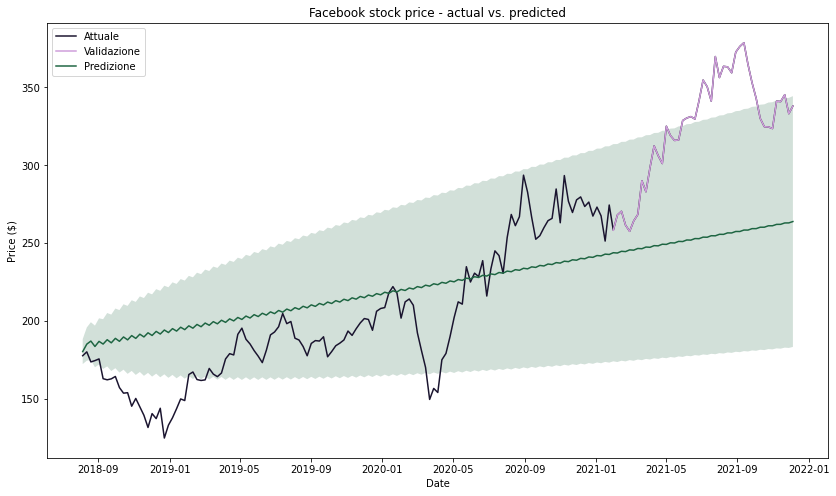

In [59]:
# Scarichiamo il validation set
df_test_fb = yf.download('FB', start='2018-07-30', end='2021-11-30', adjusted=True, progress=False)
df_val_fb = yf.download('FB', start='2021-01-30', end='2021-11-30', adjusted=True, progress=False)

# Resample settimanale della validazione e test
test_fb = df_test_fb.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close
val_fb = df_val_fb.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

n_forecasts = len(test_fb) # numero di settimane da effettuare la predizione

# Effetuiamo la predizione, utilizzando i parametri ottimizzati trovati al blocco precedente
fb_model_pred = fb_model.predict(n_periods=n_forecasts,
                                 return_conf_int=True,
                                 alpha=0.05)

fb_model_pred = [pd.DataFrame(fb_model_pred[0],
                              columns=['prediction']),
                 pd.DataFrame(fb_model_pred[1],
                              columns=['ci_lower', 'ci_upper'])]

fb_model_pred = pd.concat(fb_model_pred, axis=1).set_index(test_fb.index)

# Plot del grafico
fig, ax = plt.subplots(1)

ax = sns.lineplot(data=test_fb, color=COLORS[0], label='Attuale')
ax = sns.lineplot(data=val_fb, color=COLORS[3], label='Validazione')

ax.plot(fb_model_pred.prediction, c=COLORS[1], label='Predizione')
ax.fill_between(fb_model_pred.index,
                fb_model_pred.ci_lower,
                fb_model_pred.ci_upper,
                alpha=0.2,
                facecolor=COLORS[1])

ax.set(title="Facebook stock price - actual vs. predicted", xlabel='Date', ylabel='Price ($)')
ax.legend(loc='upper left')
fig.set_size_inches(14, 8)

In [60]:
# Confronto prezzo predizione vs prezzo reale
fb_conf = pd.DataFrame()

# Resample mensile
fb_conf['Real Price'] = val_fb.resample('M').last()
fb_conf['Prediction'] = fb_model_pred['prediction'].truncate(before='2021-01-30').resample('M').last()

print("FB Real price vs prediction mean")

fb_conf

FB Real price vs prediction mean


,Real Price,Prediction
Date,,
2021-01-31,258.329987,243.891500
2021-02-28,257.619995,245.708086
2021-03-31,283.019989,247.525226
2021-04-30,301.130005,249.342899
2021-05-31,328.730011,251.057075
2021-06-30,341.369995,252.898650
2021-07-31,369.790009,254.739760
2021-08-31,372.630005,257.528447
2021-09-30,352.959991,259.348681


### 3.2 Previsione di Alphabet (GOOG)

In [61]:
# Scarichiamo il training set - 80 mesi
goog_t_df = yf.download('GOOG', start='2011-11-30', end='2018-07-30', adjusted=True, progress=False)

# Resample di alphabet per frequenza settimanale (periodo 2012-2021)
tr_goog = goog_t_df.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

# Utiliziamo auto_arima per trovare la combinazione ideale dei parametri
# Non utilizziamo la modalità stepwise in quanto senza abbiamo un risultato leggermente migliore in base
# al valore AIC.
goog_model = pm.auto_arima(tr_goog,
                             error_action='ignore',
                             suppress_warnings=True,
                             seasonal=False,
                             stepwise=False,
                             apporximation=False,
                             n_jobs=-1)

goog_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  348
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -1546.650
Date:                Fri, 27 May 2022   AIC                           3107.301
Time:                        14:17:20   BIC                           3134.246
Sample:                             0   HQIC                          3118.029
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.6647      3.646      2.651      0.008       2.518      16.811
ar.L1         -1.3553      0.093    -14.600      0.000      -1.537      -1.173
ar.L2         -1.0973      0.073    -15.095      0.000      -1.240      -0.955
ar.L3         -0.1950      0.057     -3.446      0.001      -0.306      -0.084
ma.L1          1.2644      0.082     15.419      0.000       1.104       1.425
ma.L2          0.8167      0.056     14.639      0.000       0.707       0.926
sigma2       434.7804     19.117     22.743      0.000     397.312     472.249
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               597.48
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.52   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

da auto_arima abbiamo trovaro i valori per i parametri (3, 1, 2), utilizziamoli ora per la previsione

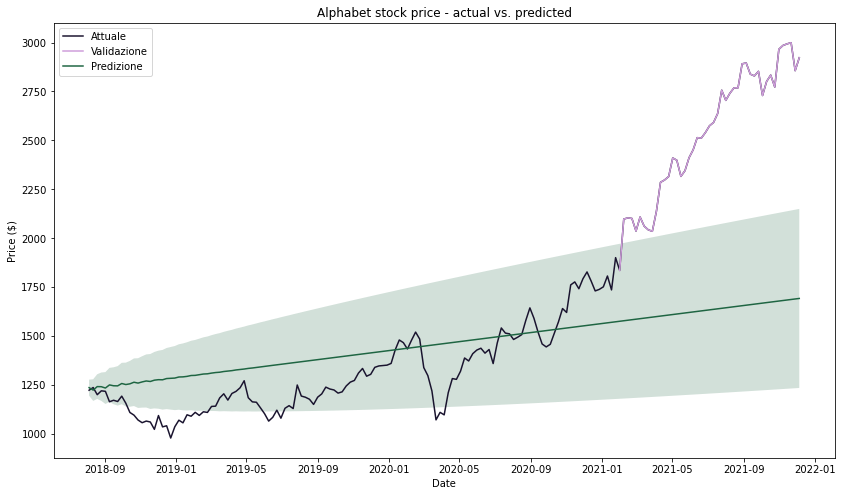

In [62]:
# Scarichiamo il validation set
df_test_goog = yf.download('GOOG', start='2018-07-30', end='2021-11-30', adjusted=True, progress=False)
df_val_goog = yf.download('GOOG', start='2021-01-30', end='2021-11-30', adjusted=True, progress=False)

# Resample settimanale della validazione e test
test_goog = df_test_goog.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close
val_goog = df_val_goog.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

n_forecasts = len(test_goog) # numero di settimane da effettuare la predizione

# Effetuiamo la predizione, utilizzando i parametri ottimizzati trovati al blocco precedente
goog_model_pred = goog_model.predict(n_periods=n_forecasts,
                                 return_conf_int=True,
                                 alpha=0.05)

goog_model_pred = [pd.DataFrame(goog_model_pred[0],
                              columns=['prediction']),
                 pd.DataFrame(goog_model_pred[1],
                              columns=['ci_lower', 'ci_upper'])]

goog_model_pred = pd.concat(goog_model_pred, axis=1).set_index(test_goog.index)

# Plot del grafico
fig, ax = plt.subplots(1)

ax = sns.lineplot(data=test_goog, color=COLORS[0], label='Attuale')
ax = sns.lineplot(data=val_goog, color=COLORS[3], label='Validazione')

ax.plot(goog_model_pred.prediction, c=COLORS[1], label='Predizione')
ax.fill_between(goog_model_pred.index,
                goog_model_pred.ci_lower,
                goog_model_pred.ci_upper,
                alpha=0.2,
                facecolor=COLORS[1])

ax.set(title="Alphabet stock price - actual vs. predicted", xlabel='Date', ylabel='Price ($)')
ax.legend(loc='upper left')
fig.set_size_inches(14, 8)

In [63]:
# Confronto prezzo predizione vs prezzo reale
goog_conf = pd.DataFrame()

# Resample mensile
goog_conf['Real Price'] = val_goog.resample('M').last()
goog_conf['Prediction'] = goog_model_pred['prediction'].truncate(before='2021-01-30').resample('M').last()

print("GOOG Real price vs prediction mean")

goog_conf

GOOG Real price vs prediction mean


,Real Price,Prediction
Date,,
2021-01-31,1835.739990,1575.988479
2021-02-28,2036.859985,1586.587168
2021-03-31,2035.550049,1597.185860
2021-04-30,2315.300049,1607.784465
2021-05-31,2411.560059,1621.032806
2021-06-30,2539.899902,1631.631479
2021-07-31,2756.320068,1642.230140
2021-08-31,2891.010010,1655.478467
2021-09-30,2852.659912,1666.077117


### 3.3 Previsione di Raytheon (RTX)

In [64]:
# Scarichiamo il training set - 80 mesi
rtx_t_df = yf.download('RTX', start='2011-11-30', end='2018-07-30', adjusted=True, progress=False)

# Resample di raytheon per frequenza settimanale (periodo 2012-2021)
tr_rtx = rtx_t_df.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

# Utiliziamo auto_arima per trovare la combinazione ideale dei parametri
# Non utilizziamo la modalità stepwise in quanto senza abbiamo un risultato leggermente migliore in base
# al valore AIC.
rtx_model = pm.auto_arima(tr_rtx,
                             error_action='ignore',
                             suppress_warnings=True,
                             seasonal=False,
                             stepwise=False,
                             apporximation=False,
                             n_jobs=-1)

rtx_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  348
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -596.913
Date:                Fri, 27 May 2022   AIC                           1201.826
Time:                        14:17:21   BIC                           1217.223
Sample:                             0   HQIC                          1207.957
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1931      0.124      1.553      0.120      -0.051       0.437
ar.L1         -0.7126      0.244     -2.919      0.004      -1.191      -0.234
ma.L1          0.6204      0.265      2.344      0.019       0.102       1.139
sigma2         1.8266      0.098     18.721      0.000       1.635       2.018
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               111.60
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

da auto_arima abbiamo trovaro i valori per i parametri (1, 1, 1), utilizziamoli ora per la previsione

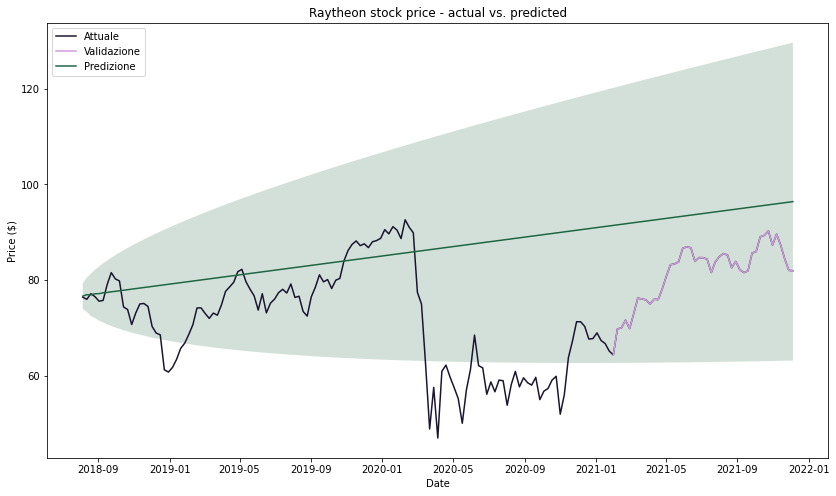

In [65]:
# Scarichiamo il validation set
df_test_rtx = yf.download('RTX', start='2018-07-30', end='2021-11-30', adjusted=True, progress=False)
df_val_rtx = yf.download('RTX', start='2021-01-30', end='2021-11-30', adjusted=True, progress=False)

# Resample settimanale della validazione e test
test_rtx = df_test_rtx.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close
val_rtx = df_val_rtx.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

n_forecasts = len(test_rtx) # numero di settimane da effettuare la predizione

# Effetuiamo la predizione, utilizzando i parametri ottimizzati trovati al blocco precedente
rtx_model_pred = rtx_model.predict(n_periods=n_forecasts,
                                 return_conf_int=True,
                                 alpha=0.05)

rtx_model_pred = [pd.DataFrame(rtx_model_pred[0],
                              columns=['prediction']),
                 pd.DataFrame(rtx_model_pred[1],
                              columns=['ci_lower', 'ci_upper'])]

rtx_model_pred = pd.concat(rtx_model_pred, axis=1).set_index(test_rtx.index)

# Plot del grafico
fig, ax = plt.subplots(1)

ax = sns.lineplot(data=test_rtx, color=COLORS[0], label='Attuale')
ax = sns.lineplot(data=val_rtx, color=COLORS[3], label='Validazione')

ax.plot(rtx_model_pred.prediction, c=COLORS[1], label='Predizione')
ax.fill_between(rtx_model_pred.index,
                rtx_model_pred.ci_lower,
                rtx_model_pred.ci_upper,
                alpha=0.2,
                facecolor=COLORS[1])

ax.set(title="Raytheon stock price - actual vs. predicted", xlabel='Date', ylabel='Price ($)')
ax.legend(loc='upper left')
fig.set_size_inches(14, 8)

In [66]:
# Confronto prezzo predizione vs prezzo reale
rtx_conf = pd.DataFrame()

# Resample mensile
rtx_conf['Real Price'] = val_rtx.resample('M').last()
rtx_conf['Prediction'] = rtx_model_pred['prediction'].truncate(before='2021-01-30').resample('M').last()

print("RTX Real price vs prediction mean")

rtx_conf

RTX Real price vs prediction mean


,Real Price,Prediction
Date,,
2021-01-31,64.404472,91.438559
2021-02-28,69.908676,91.889462
2021-03-31,75.910011,92.340364
2021-04-30,78.211502,92.791266
2021-05-31,86.664001,93.354894
2021-06-30,84.719887,93.805796
2021-07-31,83.830879,94.256698
2021-08-31,83.931091,94.820326
2021-09-30,85.660828,95.271229


### 3.4 Previsione di Lockheed Martin (LMT)

In [67]:
# Scarichiamo il training set - 80 mesi
lmt_t_df = yf.download('LMT', start='2011-11-30', end='2018-07-30', adjusted=True, progress=False)

# Resample di Lockheed Martin per frequenza settimanale (periodo 2012-2021)
tr_lmt = lmt_t_df.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

# Utiliziamo auto_arima per trovare la combinazione ideale dei parametri
# Non utilizziamo la modalità stepwise in quanto senza abbiamo un risultato leggermente migliore in base
# al valore AIC.
lmt_model = pm.auto_arima(tr_lmt,
                             error_action='ignore',
                             suppress_warnings=True,
                             seasonal=False,
                             stepwise=False,
                             apporximation=False,
                             n_jobs=-1)

lmt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  348
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -994.125
Date:                Fri, 27 May 2022   AIC                           1996.251
Time:                        14:17:22   BIC                           2011.648
Sample:                             0   HQIC                          2002.382
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6775      0.180      3.768      0.000       0.325       1.030
ma.L1         -0.1024      0.037     -2.744      0.006      -0.176      -0.029
ma.L2         -0.1406      0.034     -4.149      0.000      -0.207      -0.074
sigma2        18.0261      0.752     23.959      0.000      16.552      19.501
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               544.53
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              11.11   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

da auto_arima abbiamo trovaro i valori per i parametri (0, 1, 2), utilizziamoli ora per la previsione

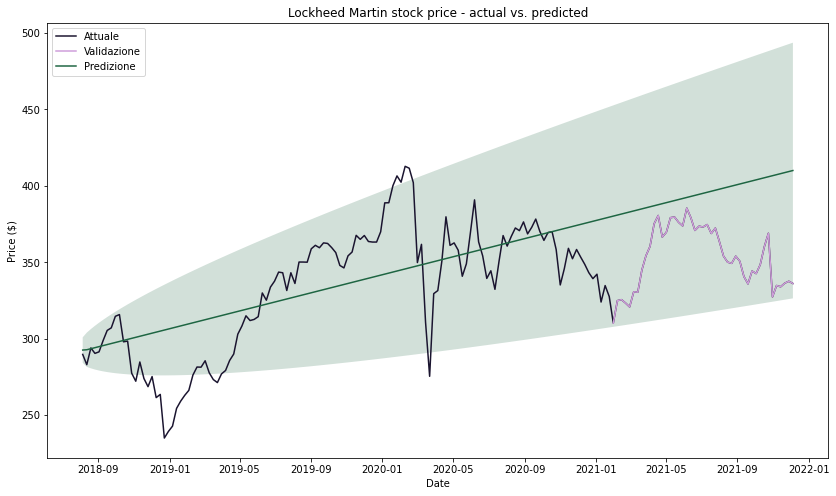

In [68]:
# Scarichiamo il validation set
df_test_lmt = yf.download('LMT', start='2018-07-30', end='2021-11-30', adjusted=True, progress=False)
df_val_lmt = yf.download('LMT', start='2021-01-30', end='2021-11-30', adjusted=True, progress=False)

# Resample settimanale della validazione e test
test_lmt = df_test_lmt.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close
val_lmt = df_val_lmt.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

n_forecasts = len(test_lmt) # numero di settimane da effettuare la predizione

# Effetuiamo la predizione, utilizzando i parametri ottimizzati trovati al blocco precedente
lmt_model_pred = lmt_model.predict(n_periods=n_forecasts,
                                 return_conf_int=True,
                                 alpha=0.05)

lmt_model_pred = [pd.DataFrame(lmt_model_pred[0],
                              columns=['prediction']),
                  pd.DataFrame(lmt_model_pred[1],
                              columns=['ci_lower', 'ci_upper'])]

lmt_model_pred = pd.concat(lmt_model_pred, axis=1).set_index(test_lmt.index)

# Plot del grafico
fig, ax = plt.subplots(1)

ax = sns.lineplot(data=test_lmt, color=COLORS[0], label='Attuale')
ax = sns.lineplot(data=val_lmt, color=COLORS[3], label='Validazione')

ax.plot(lmt_model_pred.prediction, c=COLORS[1], label='Predizione')
ax.fill_between(lmt_model_pred.index,
                lmt_model_pred.ci_lower,
                lmt_model_pred.ci_upper,
                alpha=0.2,
                facecolor=COLORS[1])

ax.set(title="Lockheed Martin stock price - actual vs. predicted", xlabel='Date', ylabel='Price ($)')
ax.legend(loc='upper left')
fig.set_size_inches(14, 8)

In [69]:
# Confronto prezzo predizione vs prezzo reale
lmt_conf = pd.DataFrame()

# Resample mensile
lmt_conf['Real Price'] = val_lmt.resample('M').last()
lmt_conf['Prediction'] = lmt_model_pred['prediction'].truncate(before='2021-01-30').resample('M').last()

print("LMT Real price vs prediction mean")

lmt_conf

LMT Real price vs prediction mean


,Real Price,Prediction
Date,,
2021-01-31,310.229340,380.194938
2021-02-28,320.796753,382.905000
2021-03-31,354.270294,385.615061
2021-04-30,366.490265,388.325123
2021-05-31,373.768311,391.712700
2021-06-30,373.582520,394.422761
2021-07-31,372.369812,397.132823
2021-08-31,354.004150,400.520400
2021-09-30,344.281647,403.230461


### 3.5 Previsione di Bank of America (BAC)

In [70]:
# Scarichiamo il training set - 80 mesi
bac_t_df = yf.download('BAC', start='2011-11-30', end='2018-07-30', adjusted=True, progress=False)

# Resample di Bank of America per frequenza settimanale (periodo 2012-2021)
tr_bac = bac_t_df.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

# Utiliziamo auto_arima per trovare la combinazione ideale dei parametri
# Non utilizziamo la modalità stepwise in quanto senza abbiamo un risultato leggermente migliore in base
# al valore AIC.
bac_model = pm.auto_arima(tr_bac,
                             error_action='ignore',
                             suppress_warnings=True,
                             seasonal=False,
                             stepwise=False,
                             apporximation=False,
                             n_jobs=-1)

bac_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  348
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -288.497
Date:                Fri, 27 May 2022   AIC                            584.994
Time:                        14:17:23   BIC                            600.391
Sample:                             0   HQIC                           591.125
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1346      0.059      2.280      0.023       0.019       0.250
ar.L1         -0.9659      0.045    -21.600      0.000      -1.054      -0.878
ma.L1          0.9321      0.063     14.784      0.000       0.809       1.056
sigma2         0.3087      0.016     19.110      0.000       0.277       0.340
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                78.58
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               3.72   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

da auto_arima abbiamo trovaro i valori per i parametri (1, 1, 1), utilizziamoli ora per la previsione

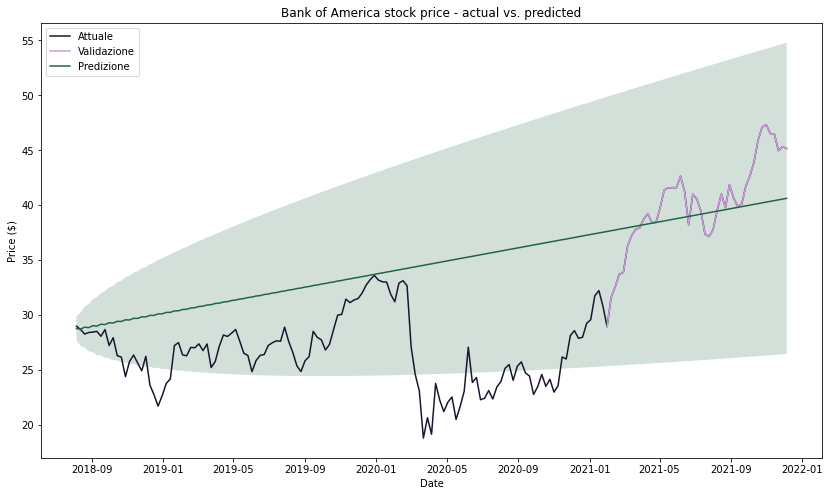

In [71]:
# Scarichiamo il validation set
df_test_bac = yf.download('BAC', start='2018-07-30', end='2021-11-30', adjusted=True, progress=False)
df_val_bac = yf.download('BAC', start='2021-01-30', end='2021-11-30', adjusted=True, progress=False)

# Resample settimanale della validazione e test
test_bac = df_test_bac.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close
val_bac = df_val_bac.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

n_forecasts = len(test_bac) # numero di settimane da effettuare la predizione

# Effetuiamo la predizione, utilizzando i parametri ottimizzati trovati al blocco precedente
bac_model_pred = bac_model.predict(n_periods=n_forecasts,
                                     return_conf_int=True,
                                     alpha=0.05)

bac_model_pred = [pd.DataFrame(bac_model_pred[0],
                              columns=['prediction']),
                  pd.DataFrame(bac_model_pred[1],
                              columns=['ci_lower', 'ci_upper'])]

bac_model_pred = pd.concat(bac_model_pred, axis=1).set_index(test_bac.index)

# Plot del grafico
fig, ax = plt.subplots(1)

ax = sns.lineplot(data=test_bac, color=COLORS[0], label='Attuale')
ax = sns.lineplot(data=val_bac, color=COLORS[3], label='Validazione')

ax.plot(bac_model_pred.prediction, c=COLORS[1], label='Predizione')
ax.fill_between(bac_model_pred.index,
                bac_model_pred.ci_lower,
                bac_model_pred.ci_upper,
                alpha=0.2,
                facecolor=COLORS[1])

ax.set(title="Bank of America stock price - actual vs. predicted", xlabel='Date', ylabel='Price ($)')
ax.legend(loc='upper left')
fig.set_size_inches(14, 8)

In [72]:
# Confronto prezzo predizione vs prezzo reale
bac_conf = pd.DataFrame()

# Resample mensile
bac_conf['Real Price'] = val_bac.resample('M').last()
bac_conf['Prediction'] = bac_model_pred['prediction'].truncate(before='2021-01-30').resample('M').last()

print("BAC Real price vs prediction mean")

bac_conf

BAC Real price vs prediction mean


,Real Price,Prediction
Date,,
2021-01-31,28.948439,37.612356
2021-02-28,33.888714,37.886083
2021-03-31,37.952354,38.159822
2021-04-30,38.442951,38.433571
2021-05-31,41.592560,38.774982
2021-06-30,41.008953,39.048852
2021-07-31,37.146503,39.322715
2021-08-31,41.866177,39.665538
2021-09-30,41.734093,39.939325


### 3.6 Previsione di JPMorgan Chase (JPM)

In [73]:
# Scarichiamo il training set - 80 mesi
jpm_t_df = yf.download('JPM', start='2011-11-30', end='2018-07-30', adjusted=True, progress=False)

# Resample di JPMorgan Chase per frequenza settimanale (periodo 2012-2021)
tr_jpm = jpm_t_df.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

# Utiliziamo auto_arima per trovare la combinazione ideale dei parametri
# Non utilizziamo la modalità stepwise in quanto senza abbiamo un risultato leggermente migliore in base
# al valore AIC.
jpm_model = pm.auto_arima(tr_jpm,
                             error_action='ignore',
                             suppress_warnings=True,
                             seasonal=False,
                             stepwise=False,
                             apporximation=False,
                             n_jobs=-1)

jpm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  348
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -666.058
Date:                Fri, 27 May 2022   AIC                           1336.116
Time:                        14:17:25   BIC                           1343.815
Sample:                             0   HQIC                          1339.182
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2293      0.089      2.589      0.010       0.056       0.403
sigma2         2.7212      0.135     20.194      0.000       2.457       2.985
===================================================================================
Ljung-Box (L1) (Q):                   1.35   Jarque-Bera (JB):               105.47
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               4.24   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

da auto_arima abbiamo trovaro i valori per i parametri (0, 1, 0), utilizziamoli ora per la previsione

si nota che qui si ha un caso particolare di parametri per ARIMA, ottenendo la passeggiata aleatoria

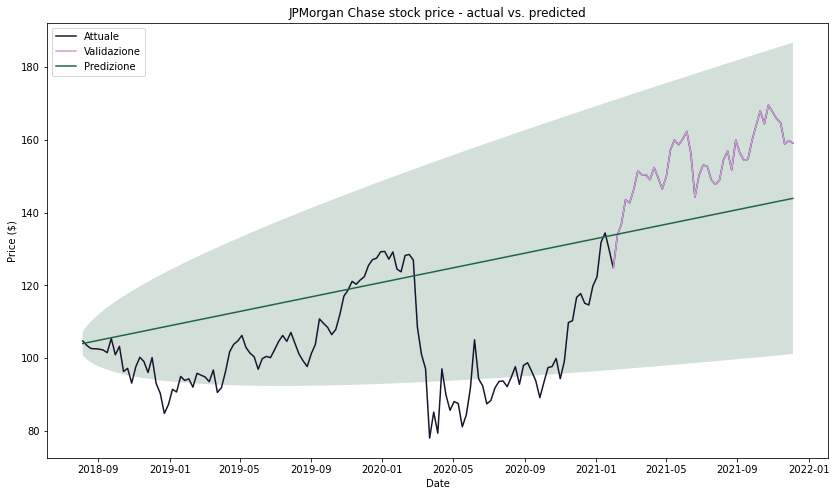

In [74]:
# Scarichiamo il validation set
df_test_jpm = yf.download('JPM', start='2018-07-30', end='2021-11-30', adjusted=True, progress=False)
df_val_jpm = yf.download('JPM', start='2021-01-30', end='2021-11-30', adjusted=True, progress=False)

# Resample settimanale della validazione e test
test_jpm = df_test_jpm.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close
val_jpm = df_val_jpm.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

n_forecasts = len(test_jpm) # numero di settimane da effettuare la predizione

# Effetuiamo la predizione, utilizzando i parametri ottimizzati trovati al blocco precedente
jpm_model_pred = jpm_model.predict(n_periods=n_forecasts,
                                     return_conf_int=True,
                                     alpha=0.05)

jpm_model_pred = [pd.DataFrame(jpm_model_pred[0],
                              columns=['prediction']),
                  pd.DataFrame(jpm_model_pred[1],
                              columns=['ci_lower', 'ci_upper'])]

jpm_model_pred = pd.concat(jpm_model_pred, axis=1).set_index(test_jpm.index)

# Plot del grafico
fig, ax = plt.subplots(1)

ax = sns.lineplot(data=test_jpm, color=COLORS[0], label='Attuale')
ax = sns.lineplot(data=val_jpm, color=COLORS[3], label='Validazione')

ax.plot(jpm_model_pred.prediction, c=COLORS[1], label='Predizione')
ax.fill_between(jpm_model_pred.index,
                jpm_model_pred.ci_lower,
                jpm_model_pred.ci_upper,
                alpha=0.2,
                facecolor=COLORS[1])

ax.set(title="JPMorgan Chase stock price - actual vs. predicted", xlabel='Date', ylabel='Price ($)')
ax.legend(loc='upper left')
fig.set_size_inches(14, 8)

In [75]:
# Confronto prezzo predizione vs prezzo reale
jpm_conf = pd.DataFrame()

# Resample mensile
jpm_conf['Real Price'] = val_jpm.resample('M').last()
jpm_conf['Prediction'] = jpm_model_pred['prediction'].truncate(before='2021-01-30').resample('M').last()

print("JPM Real price vs prediction mean")

jpm_conf

JPM Real price vs prediction mean


,Real Price,Prediction
Date,,
2021-01-31,124.743980,133.821011
2021-02-28,142.679504,134.738236
2021-03-31,150.357834,135.655461
2021-04-30,146.464935,136.572685
2021-05-31,160.166458,137.719216
2021-06-30,150.229202,138.636441
2021-07-31,147.750320,139.553666
2021-08-31,159.922256,140.700197
2021-09-30,159.912445,141.617422


## 4. Strategie di trading e Backtesting

Per trovare una strategia di trading ed effettuare il backtesting è stata utilizzata la libreria backtrader,
come titolo su cui creare una strategia e testarla ho deciso di utilizzare **Meta** (FB) in quanto la elevata volatilià renderebbe il test interessante.

### 4.1 Definzione dell'algoritmo di trading BB

Per effettuare il trading utilizzaimo un algoritmo che sfrutta le Bollinger Bands, creiamo qui sotto la classe che effettuerà algorithmic trading usando la strategia.

In [76]:
# Importiamo le librerie utili per la creazione dell'algoritmo
import backtrader as bt
import datetime
import pandas as pd

# Classe contenente la strategia di trading BB
class BBand_Strategy(bt.Strategy):
    params = (('period', 20),
             ('devfactor', 2.0),)
    
    def __init__(self):
        # Nel costruttore, teniamo traccia del prezzo di chisura nella serie
        self.data_close = self.datas[0].close
        self.data_open = self.datas[0].open
        
        # qui teniamo traccia della commissione sugli ordini in attesa di acquisto/vendita
        self.order = None
        self.price = None
        self.comm = None
        
        # aggiungiamo gli indicatori BB e impostiamo i segnali di buy/sell
        self.b_band = bt.ind.BollingerBands(self.datas[0],
                                            period=self.p.period,
                                            devfactor=self.p.devfactor)
        # Buy nel caso di crossover banda inferiore
        self.buy_signal = bt.ind.CrossOver(self.datas[0],
                                           self.b_band.lines.bot)
        # Sell nel caso di crossover banda superiore
        self.sell_signal = bt.ind.CrossOver(self.datas[0],
                                            self.b_band.lines.top)
        
    def log(self, txt):
        # Blocco per loggare l'andamento del prezzo
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')
        
    def notify_order(self, order):
        # se l'ordine è già stato accettato o inviato ritorniamo subito
        if order.status in [order.Submitted, order.Accepted]:
            return
        
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}')
                self.price = order.executed.price
                self.comm = order.executed.comm
            else:
                self.log(f'SELL EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}')
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Failed')
        
        self.order = None
    
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')
        
    def next_open(self):
        if not self.position:
            if self.buy_signal > 0:
                size = int(self.broker.getcash() / self.datas[0].open)
                self.log(f'BUY CREATED --- Size: {size}, Cash: {self.broker.getcash():.2f}, Open: {self.data_open[0]}, Close: {self.data_close[0]}')
                self.buy(size=size)
        else:
            if self.sell_signal < 0:
                self.log(f'SELL CREATED --- Size: {self.position.size}')
                self.sell(size=self.position.size)
                 

### 4.2 Applicazione dell'algoritmo per Meta (FB) e backtesting per periodo 2020

Applichiamo l'algoritmo di trading definito qui sopra (BB) su Meta, e ci effettuiamo il backtesting

In [77]:
# Effetuiamo il download sempre da YF dei dati
#fb_data = bt.feeds.YahooFinanceData(dataname='FB', 
#                                    fromdate=datetime.datetime(2020, 01, 01), 
#                                    todate=datetime.datetime(2020, 11, 01))

# Carichiamo i dati manualmente in quanto bt attualmente ha problemi con il download diretto da yf
fb_data = bt.feeds.YahooFinanceCSVData(dataname='../DATA/FB-2020.csv')

# istanziamo celebro, e ne effettuiamo il backtest
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
cerebro.addstrategy(BBand_Strategy) # aggiungiamo la strategia che abbiamo creato al blocco precedente
cerebro.adddata(fb_data) # aggiungiamo i dati scaricati da yf
cerebro.broker.setcash(10000.0) # impostiamo i soldi da investire come 10000$
cerebro.broker.setcommission(commission=0.001) # costo di commissione

cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='time_return')

# Facciamo partire ora il backtest
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
2020-02-05, BUY CREATED --- Size: 47, Cash: 10000.00, Open: 212.51, Close: 210.11
2020-02-05, BUY EXECUTED --- Price: 212.51, Cost: 9987.97, Commission: 9.99
2020-05-04, SELL CREATED --- Size: 47
2020-05-04, SELL EXECUTED --- Price: 200.20, Cost: 9987.97, Commission: 9.41
2020-05-04, OPERATION RESULT --- Gross: -578.57, Net: -597.97
2020-06-30, BUY CREATED --- Size: 42, Cash: 9402.03, Open: 220.59, Close: 227.07
2020-06-30, BUY EXECUTED --- Price: 220.59, Cost: 9264.78, Commission: 9.26
2020-08-04, SELL CREATED --- Size: 42
2020-08-04, SELL EXECUTED --- Price: 251.56, Cost: 9264.78, Commission: 10.57
2020-08-04, OPERATION RESULT --- Gross: 1300.74, Net: 1280.91
Final Portfolio Value: 10682.94


<IPython.core.display.Javascript object>


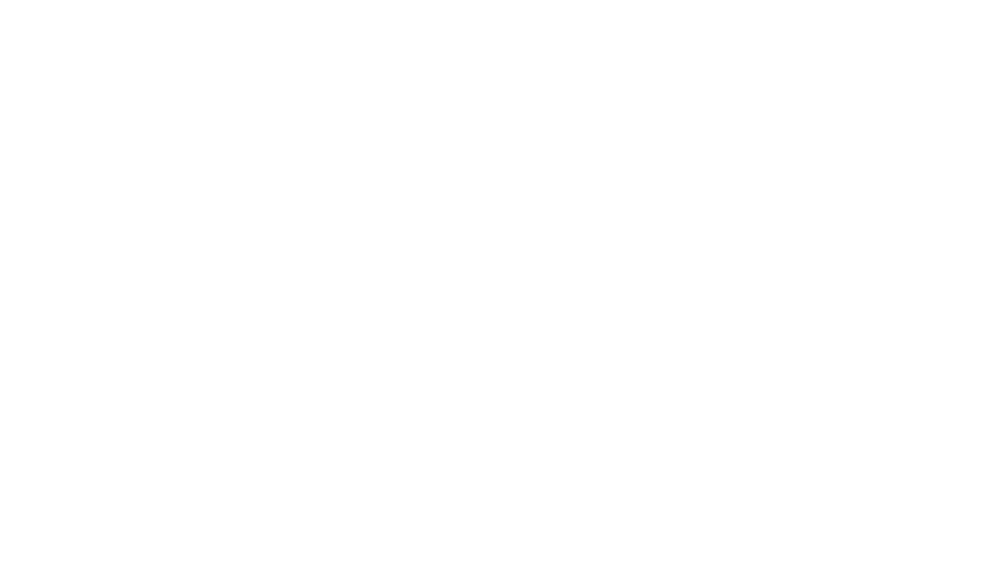

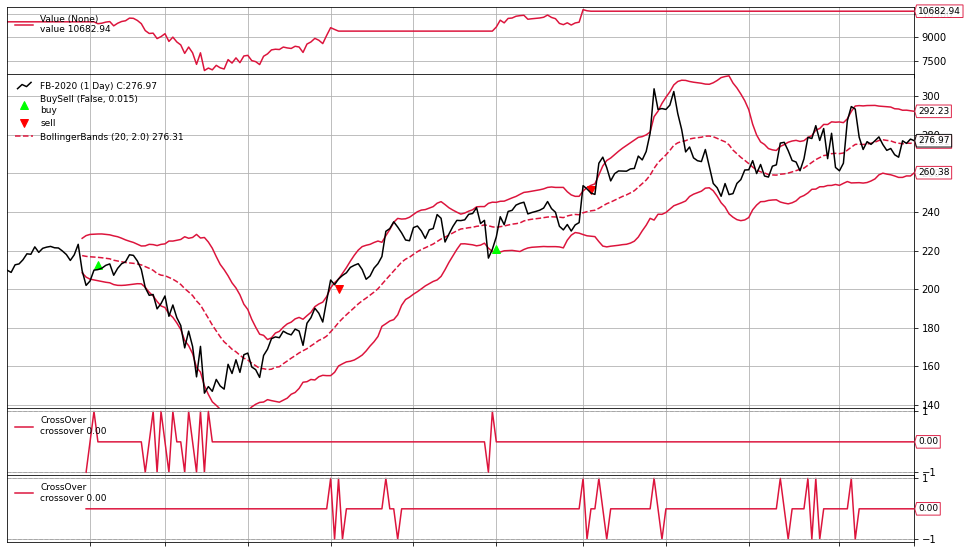

In [78]:
# Plot del grafico
plt.rcParams['figure.figsize']=[14, 8]
cerebro.plot(iplot=True, volume=False)

plt.show()

#### Investigazione delle metriche

Il ritorno annuale normalizzato `rnorm100` è pari al $7.47\%$

In [79]:
# Metriche sul backtesting
print(backtest_result[0].analyzers.returns.get_analysis())

OrderedDict([('rtot', 0.06606320165877516), ('ravg', 0.00028598788596872365), ('rnorm', 0.07472944116402382), ('rnorm100', 7.472944116402382)])


<IPython.core.display.Javascript object>


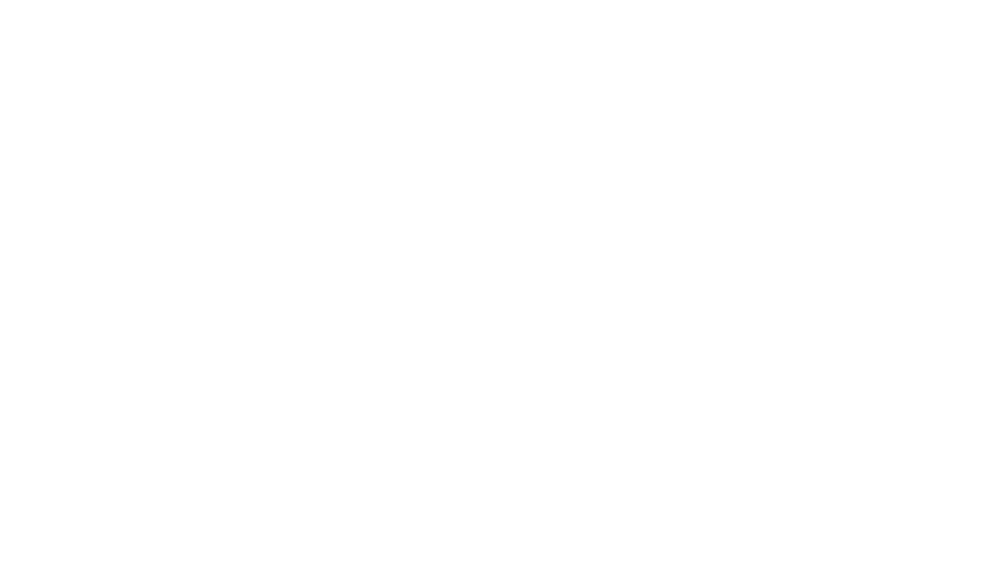

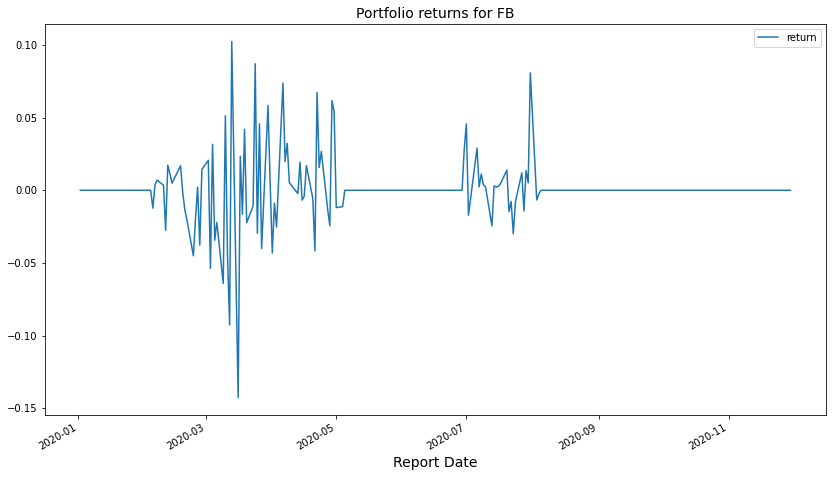

In [80]:
# grafico sui Ritorni del portfolio
returns_dict = backtest_result[0].analyzers.time_return.get_analysis()
returns_df = pd.DataFrame(list(returns_dict.items()),
columns = ['report_date', 'return']).set_index('report_date')
returns_df.plot(title='Portfolio returns')
plt.title("Portfolio returns for FB", fontsize=14)
plt.xlabel("Report Date", fontsize=14)
plt.show()

## 5. CAPM

### 5.1 Calcolo dell'indice beta per tutti i titoli

È considerato il seguente indice di mercato: `S&P 500` (`^GSPC`).

#### Meta (FB)

In [81]:
# Import delle librerie necessarie
import statsmodels.api as sm

# Set delle variabili relative a costa stiamo analizzando
RISKY_ASSET = 'FB'
MARKET_BENCHMARK = '^GSPC' # usiamo S&P 500
START_DATE = '2011-11-30'
END_DATE = '2021-11-30'

# Download dei dati da YF del risky asset e benchmark
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)

# Resample dei dati scaricati a cadenza mensile
X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset',
                                    MARKET_BENCHMARK: 'market'}).resample('M').last().pct_change().dropna()

# Calcolo di beta usando il metodo della covarianza
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance

print("Indice beta per FB con S&P 500: " + str(round(beta, 4)))

Indice beta per FB con S&P 500: 1.1146


#### Alphabet (GOOG)

In [82]:
# Set delle variabili relative a costa stiamo analizzando
RISKY_ASSET = 'GOOG'
MARKET_BENCHMARK = '^GSPC' # usiamo S&P 500
START_DATE = '2011-11-30'
END_DATE = '2021-11-30'

# Download dei dati da YF del risky asset e benchmark
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)

# Resample dei dati scaricati a cadenza mensile
X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset',
                                    MARKET_BENCHMARK: 'market'}).resample('M').last().pct_change().dropna()

# Calcolo di beta usando il metodo della covarianza
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance

print("Indice beta per GOOG con S&P 500: " + str(round(beta, 4)))

Indice beta per GOOG con S&P 500: 1.0138


#### Raytheon (RTX)

In [83]:
# Set delle variabili relative a costa stiamo analizzando
RISKY_ASSET = 'RTX'
MARKET_BENCHMARK = '^GSPC' # usiamo S&P 500
START_DATE = '2011-11-30'
END_DATE = '2021-11-30'

# Download dei dati da YF del risky asset e benchmark
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)

# Resample dei dati scaricati a cadenza mensile
X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset',
                                    MARKET_BENCHMARK: 'market'}).resample('M').last().pct_change().dropna()

# Calcolo di beta usando il metodo della covarianza
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance

print("Indice beta per RTX con S&P 500: " + str(round(beta, 4)))

Indice beta per RTX con S&P 500: 1.3118


#### Lockheed Martin (LMT)

In [84]:
# Set delle variabili relative a costa stiamo analizzando
RISKY_ASSET = 'LMT'
MARKET_BENCHMARK = '^GSPC' # usiamo S&P 500
START_DATE = '2011-11-30'
END_DATE = '2021-11-30'

# Download dei dati da YF del risky asset e benchmark
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)

# Resample dei dati scaricati a cadenza mensile
X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset',
                                    MARKET_BENCHMARK: 'market'}).resample('M').last().pct_change().dropna()

# Calcolo di beta usando il metodo della covarianza
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance

print("Indice beta per LMT con S&P 500: " + str(round(beta, 4)))

Indice beta per LMT con S&P 500: 0.835


#### Bank of America (BAC)

In [85]:
# Set delle variabili relative a costa stiamo analizzando
RISKY_ASSET = 'BAC'
MARKET_BENCHMARK = '^GSPC' # usiamo S&P 500
START_DATE = '2011-11-30'
END_DATE = '2021-11-30'

# Download dei dati da YF del risky asset e benchmark
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)

# Resample dei dati scaricati a cadenza mensile
X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset',
                                    MARKET_BENCHMARK: 'market'}).resample('M').last().pct_change().dropna()

# Calcolo di beta usando il metodo della covarianza
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance

print("Indice beta per BAC con S&P 500: " + str(round(beta, 4)))

Indice beta per BAC con S&P 500: 1.5124


#### JPMorgan Chase (JPM)

In [86]:
# Set delle variabili relative a costa stiamo analizzando
RISKY_ASSET = 'JPM'
MARKET_BENCHMARK = '^GSPC' # usiamo S&P 500
START_DATE = '2011-11-30'
END_DATE = '2021-11-30'

# Download dei dati da YF del risky asset e benchmark
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)

# Resample dei dati scaricati a cadenza mensile
X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset',
                                    MARKET_BENCHMARK: 'market'}).resample('M').last().pct_change().dropna()

# Calcolo di beta usando il metodo della covarianza
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance

print("Indice beta per JPM con S&P 500: " + str(round(beta, 4)))

Indice beta per JPM con S&P 500: 1.2579


### 5.2 Calcolo Esposizione con Fama-French

#### Preparazione del dataset

In [87]:
# Import librerie necessarie
import statsmodels.formula.api as smf

# Data di considerazione
START_DATE = '2011-11-30'
END_DATE = '2021-11-30'

# Carichiamo il dataframe con il fattore
factor_df = pd.read_csv('../DATA/F-F_Research_Data_Factors.CSV',
                        skiprows=3)
STR_TO_MATCH = ' Annual Factors: January-December '
indices = factor_df.iloc[:, 0] == STR_TO_MATCH
start_of_annual = factor_df[indices].index[0]
factor_df = factor_df[factor_df.index < start_of_annual]

# rename delle colonne del dataframe e set dell'indice datetime e filtri per data
factor_df.columns = ['date', 'mkt', 'smb', 'hml', 'rf']
factor_df['date'] = pd.to_datetime(factor_df['date'],
                                   format='%Y%m').dt.strftime("%Y-%m")
factor_df = factor_df.set_index('date')
factor_df = factor_df.loc[START_DATE:END_DATE]

# Conversione dei valori in valori numerici e divisione per 100
factor_df = factor_df.apply(pd.to_numeric,
                            errors='coerce').div(100)

#### Meta (FB)

In [88]:
# Set delle variabili relative al titolo in analisi e ad il periodo
RISKY_ASSET = 'FB'
START_DATE = '2011-11-30'
END_DATE = '2021-11-30'

# Download del risky asset
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

# Resample e calcolo dei rendimenti mensili
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'

# Merge dei due dataset e calcolo dell'eccesso di ritorno
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
fb_ff_data = ff_data

# Stima del modello a tre fattori
ff_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml',
                   data=ff_data).fit()

print(ff_model.summary())

fb_intercept, fb_b1, fb_b2, fb_b3 = ff_model.params # Assegnazione dei dati per calcoli successivi

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     8.851
Date:                Fri, 27 May 2022   Prob (F-statistic):           2.63e-05
Time:                        14:17:27   Log-Likelihood:                 112.20
No. Observations:                 114   AIC:                            -216.4
Df Residuals:                     110   BIC:                            -205.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0100      0.009      1.089      0.2

#### Alphabet (GOOG)

In [89]:
# Set delle variabili relative al titolo in analisi e ad il periodo
RISKY_ASSET = 'GOOG'
START_DATE = '2011-11-30'
END_DATE = '2021-11-30'

# Download del risky asset
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

# Resample e calcolo dei rendimenti mensili
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'

# Merge dei due dataset e calcolo dell'eccesso di ritorno
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
goog_ff_data = ff_data

# Stima del modello a tre fattori
ff_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml',
                   data=ff_data).fit()

print(ff_model.summary())

goog_intercept, goog_b1, goog_b2, goog_b3 = ff_model.params # Assegnazione dei dati per calcoli successivi

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     24.92
Date:                Fri, 27 May 2022   Prob (F-statistic):           1.63e-12
Time:                        14:17:28   Log-Likelihood:                 191.82
No. Observations:                 120   AIC:                            -375.6
Df Residuals:                     116   BIC:                            -364.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0068      0.005      1.400      0.1

#### Raytheon (RTX)

In [90]:
# Set delle variabili relative al titolo in analisi e ad il periodo
RISKY_ASSET = 'RTX'
START_DATE = '2011-11-30'
END_DATE = '2021-11-30'

# Download del risky asset
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

# Resample e calcolo dei rendimenti mensili
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'

# Merge dei due dataset e calcolo dell'eccesso di ritorno
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
rtx_ff_data = ff_data

# Stima del modello a tre fattori
ff_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml',
                   data=ff_data).fit()

print(ff_model.summary())

rtx_intercept, rtx_b1, rtx_b2, rtx_b3 = ff_model.params # Assegnazione dei dati per calcoli successivi

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     59.36
Date:                Fri, 27 May 2022   Prob (F-statistic):           2.50e-23
Time:                        14:17:28   Log-Likelihood:                 210.65
No. Observations:                 120   AIC:                            -413.3
Df Residuals:                     116   BIC:                            -402.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0067      0.004     -1.612      0.1

#### Lockheed Martin (LMT)

In [91]:
# Set delle variabili relative al titolo in analisi e ad il periodo
RISKY_ASSET = 'LMT'
START_DATE = '2011-11-30'
END_DATE = '2021-11-30'

# Download del risky asset
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

# Resample e calcolo dei rendimenti mensili
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'

# Merge dei due dataset e calcolo dell'eccesso di ritorno
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
lmt_ff_data = ff_data

# Stima del modello a tre fattori
ff_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml',
                   data=ff_data).fit()

print(ff_model.summary())

lmt_intercept, lmt_b1, lmt_b2, lmt_b3 = ff_model.params # Assegnazione dei dati per calcoli successivi

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     24.01
Date:                Fri, 27 May 2022   Prob (F-statistic):           3.70e-12
Time:                        14:17:28   Log-Likelihood:                 210.71
No. Observations:                 120   AIC:                            -413.4
Df Residuals:                     116   BIC:                            -402.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0046      0.004      1.103      0.2

#### Bank of America (BAC)

In [92]:
# Set delle variabili relative al titolo in analisi e ad il periodo
RISKY_ASSET = 'BAC'
START_DATE = '2011-11-30'
END_DATE = '2021-11-30'

# Download del risky asset
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

# Resample e calcolo dei rendimenti mensili
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'

# Merge dei due dataset e calcolo dell'eccesso di ritorno
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
bac_ff_data = ff_data

# Stima del modello a tre fattori
ff_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml',
                   data=ff_data).fit()

print(ff_model.summary())

bac_intercept, bac_b1, bac_b2, bac_b3 = ff_model.params # Assegnazione dei dati per calcoli successivi

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     58.87
Date:                Fri, 27 May 2022   Prob (F-statistic):           3.34e-23
Time:                        14:17:28   Log-Likelihood:                 178.26
No. Observations:                 120   AIC:                            -348.5
Df Residuals:                     116   BIC:                            -337.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0073      0.005      1.356      0.1

#### JPMorgan Chase (JPM)

In [93]:
# Set delle variabili relative al titolo in analisi e ad il periodo
RISKY_ASSET = 'JPM'
START_DATE = '2011-11-30'
END_DATE = '2021-11-30'

# Download del risky asset
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

# Resample e calcolo dei rendimenti mensili
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'

# Merge dei due dataset e calcolo dell'eccesso di ritorno
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
jpm_ff_data = ff_data

# Stima del modello a tre fattori
ff_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml',
                   data=ff_data).fit()

print(ff_model.summary())

jpm_intercept, jpm_b1, jpm_b2, jpm_b3 = ff_model.params # Assegnazione dei dati per calcoli successivi

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     86.28
Date:                Fri, 27 May 2022   Prob (F-statistic):           2.06e-29
Time:                        14:17:29   Log-Likelihood:                 221.60
No. Observations:                 120   AIC:                            -435.2
Df Residuals:                     116   BIC:                            -424.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0058      0.004      1.541      0.1

### 5.3 Calcolo dei rendimenti usando beta

Utilizzando i dati del Dr. French calcoliamo i rendimenti attesi

#### Preparazione dei dati necessari

In [94]:
rf = factor_df['rf'].mean()
size_premium = factor_df['smb'].mean()
value_premium = factor_df['hml'].mean()

ff_data['Mkt-RF'] = ff_data.mkt - ff_data.rf # Rimozione del risk-free
market_premium = ff_data["Mkt-RF"].mean()

#### Meta (FB)

In [95]:
fb_exp_monthly_return = rf  + fb_b1 * market_premium + fb_b2 * size_premium + fb_b3 * value_premium 
fb_exp_yearly_return = fb_exp_monthly_return * 12

print("Meta (FB) expected monthly return: " + str(round(fb_exp_monthly_return, 4)))
print("Meta (FB) expected yearly return: " + str(round(fb_exp_yearly_return, 4)))

Meta (FB) expected monthly return: 0.0156
Meta (FB) expected yearly return: 0.1877


#### Alphabet (GOOG)

In [96]:
goog_exp_monthly_return = rf  + goog_b1 * market_premium + goog_b2 * size_premium + goog_b3 * value_premium 
goog_exp_yearly_return = goog_exp_monthly_return * 12

print("Alphabet (GOOG) monthly return: " + str(round(goog_exp_monthly_return, 4)))
print("Alphabet (GOOG) expected yearly return: " + str(round(goog_exp_yearly_return, 4)))

Alphabet (GOOG) monthly return: 0.0139
Alphabet (GOOG) expected yearly return: 0.1664


#### Raytheon (RTX)

In [97]:
rtx_exp_monthly_return = rf  + rtx_b1 * market_premium + rtx_b2 * size_premium + rtx_b3 * value_premium 
rtx_exp_yearly_return = rtx_exp_monthly_return * 12

print("Raytheon (RTX) monthly return: " + str(round(rtx_exp_monthly_return, 4)))
print("Raytheon (RTX) expected yearly return: " + str(round(rtx_exp_yearly_return, 4)))

Raytheon (RTX) monthly return: 0.0149
Raytheon (RTX) expected yearly return: 0.1783


#### Lockheed Martin (LMT)

In [98]:
lmt_exp_monthly_return = rf  + lmt_b1 * market_premium + lmt_b2 * size_premium + lmt_b3 * value_premium 
lmt_exp_yearly_return = lmt_exp_monthly_return * 12

print("Lockheed Martin (LMT) monthly return: " + str(round(lmt_exp_monthly_return, 4)))
print("Lockheed Martin (LMT) expected yearly return: " + str(round(lmt_exp_yearly_return, 4)))

Lockheed Martin (LMT) monthly return: 0.0114
Lockheed Martin (LMT) expected yearly return: 0.1366


#### Bank of America (BAC)

In [99]:
bac_exp_monthly_return = rf  + bac_b1 * market_premium + bac_b2 * size_premium + bac_b3 * value_premium 
bac_exp_yearly_return = bac_exp_monthly_return * 12

print("Bank of America (BAC) monthly return: " + str(round(bac_exp_monthly_return, 4)))
print("Bank of America (BAC) expected yearly return: " + str(round(bac_exp_yearly_return, 4)))

Bank of America (BAC) monthly return: 0.0149
Bank of America (BAC) expected yearly return: 0.1782


#### JPMorgan Chase (JPM)

In [100]:
jpm_exp_monthly_return = rf  + jpm_b1 * market_premium + jpm_b2 * size_premium + jpm_b3 * value_premium 
jpm_exp_yearly_return = jpm_exp_monthly_return * 12

print("JPMorgan Chase (JPM) monthly return: " + str(round(jpm_exp_monthly_return, 4)))
print("JPMorgan Chase (JPM) expected yearly return: " + str(round(jpm_exp_yearly_return, 4)))

JPMorgan Chase (JPM) monthly return: 0.0123
JPMorgan Chase (JPM) expected yearly return: 0.147


## 6. Costruzione di un portfolio

### 6.1 1/n portfolio (portfolio effettivo)

#### Dati passati reali (108 mesi)

[*********************100%***********************]  6 of 6 completed


/home/tommy/anaconda3/envs/bi/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2012-05-21
End date,2020-11-27
Total months,102
,Backtest
Annual return,22.2%
Cumulative returns,453.2%
Annual volatility,20.9%
Sharpe ratio,1.07
Calmar ratio,0.56
Stability,0.94
Max drawdown,-39.9%


<IPython.core.display.Javascript object>


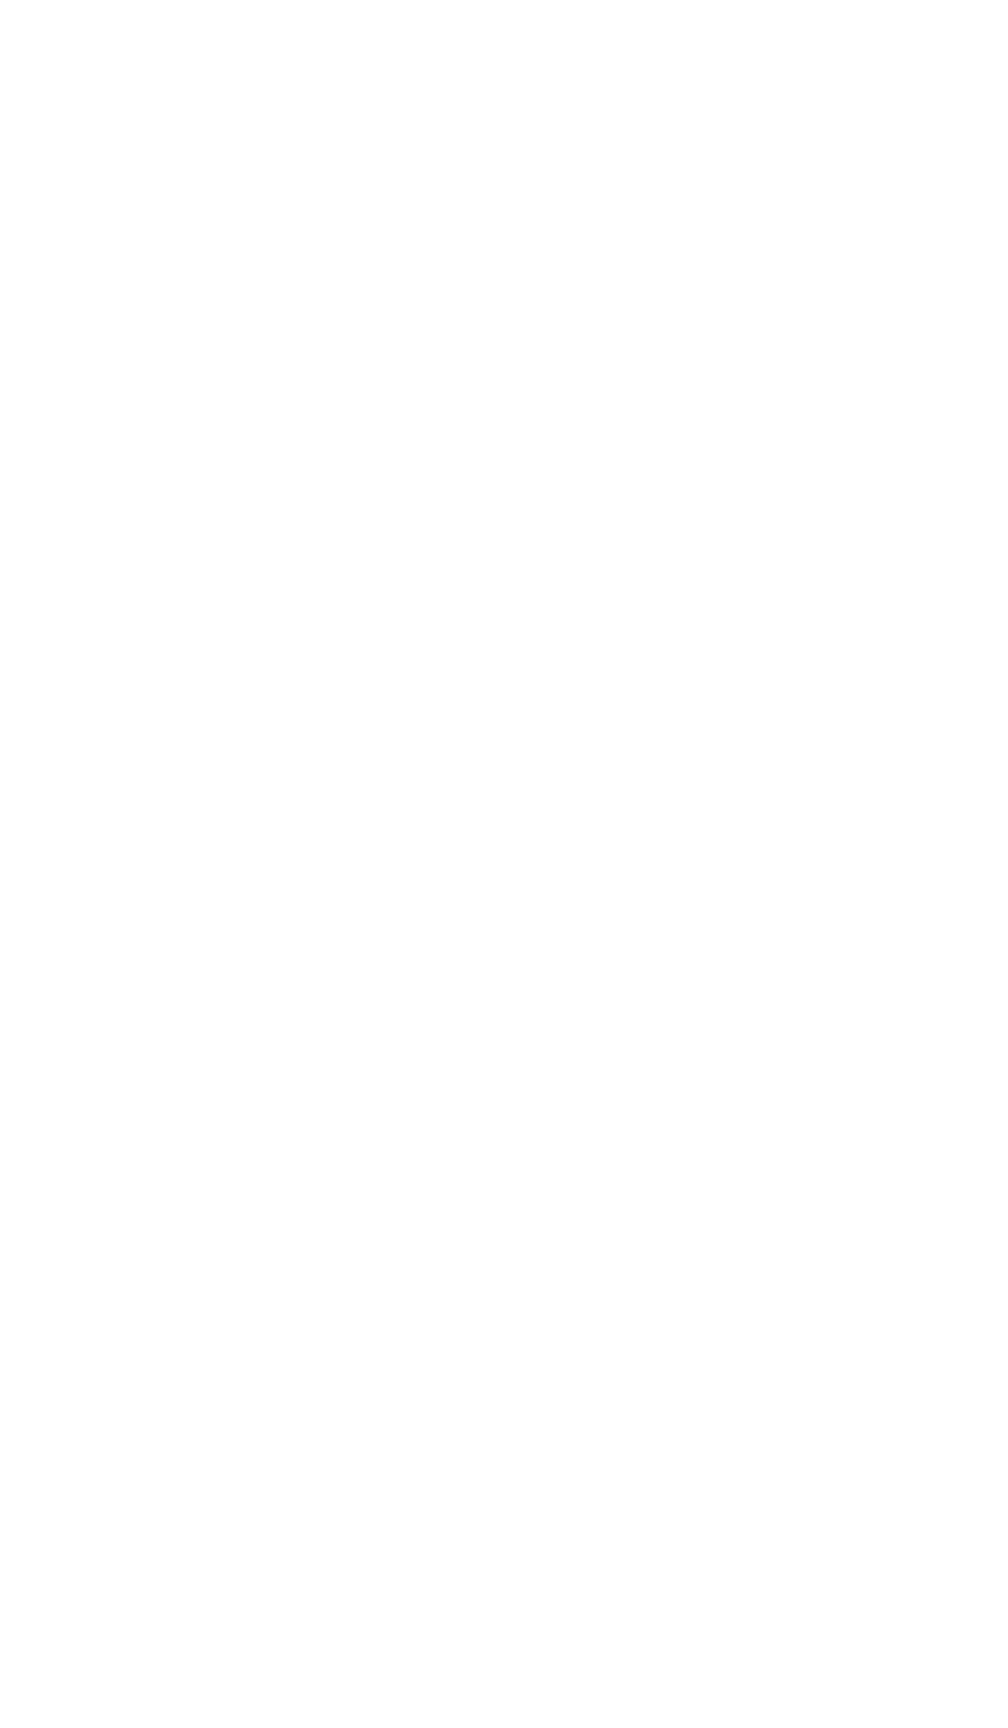

/home/tommy/anaconda3/envs/bi/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


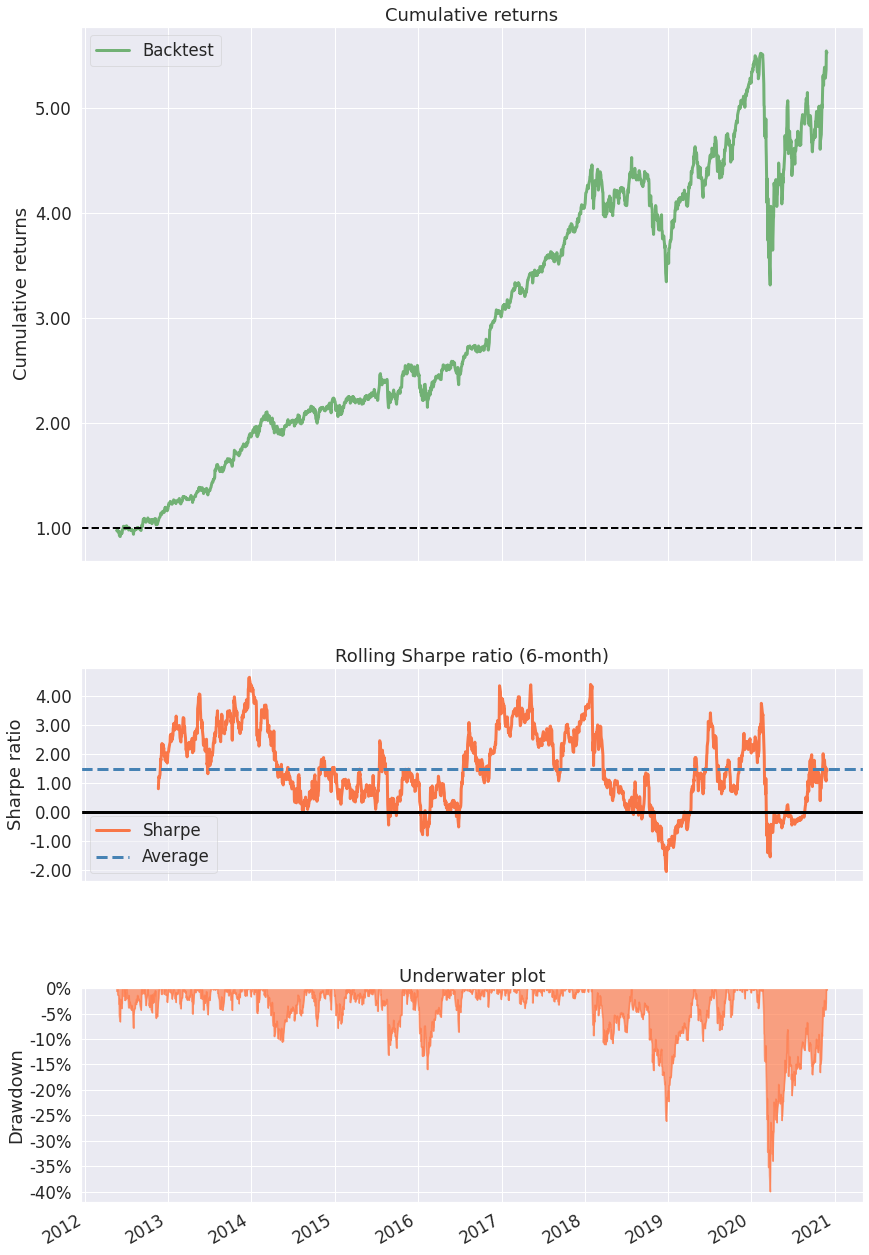

In [104]:
# Import delle librerie necessarie
import pyfolio as pf

# Setup dei parametri utilizzati
RISKY_ASSETS = ['FB', 'GOOG', 'RTX', 'LMT', 'BAC', 'JPM']
START_DATE = '2011-11-30'
END_DATE = '2020-11-30' # utilizziamo i primi 108 mesi di dati

n_assets = len(RISKY_ASSETS)

prices_df = yf.download(RISKY_ASSETS, start=START_DATE,
                        end=END_DATE, adjusted=True)

# Calcoliamo i rendimenti indivduali
returns = prices_df['Adj Close'].pct_change().dropna()

# Definiamo il peso (1/n)
portfolio_weights = n_assets * [1 / n_assets]

# Calcoliamo i rendimenti del portfolio
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T),
                              index=returns.index)

pf.create_simple_tear_sheet(portfolio_returns)

#### Dati di previsione

In [108]:
# TODO

### 6.2 Metodo con Simulazione

Utilizziamo le simulazioni di monte carlo per determinare la frontiera di efficenza

#### Dati reali passati (108 mesi)

<IPython.core.display.Javascript object>


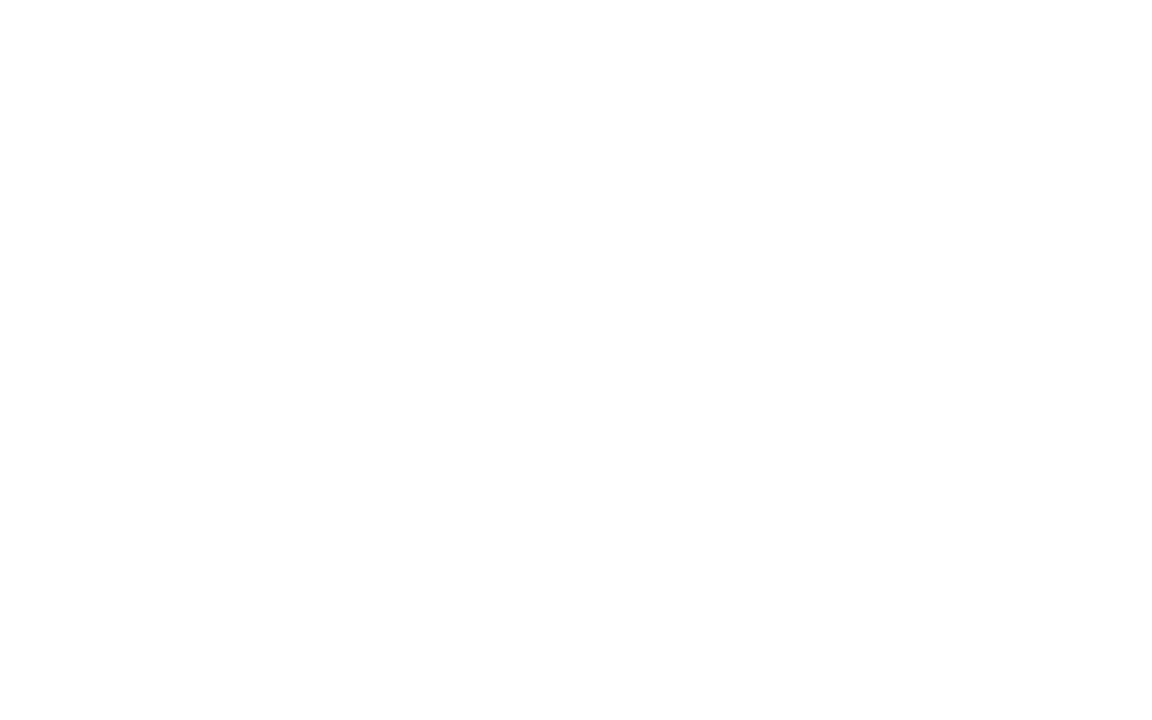

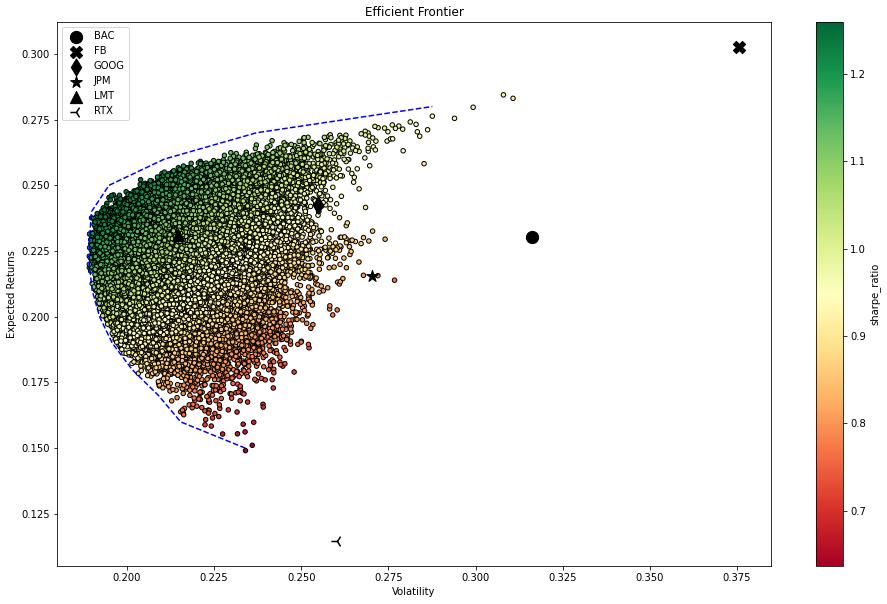

In [119]:
# Parametri
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252 # Media di giorni annuali di trading
RISKY_ASSETS = ['FB', 'GOOG', 'RTX', 'LMT', 'BAC', 'JPM']
RISKY_ASSETS.sort()
START_DATE = '2011-11-30'
END_DATE = '2020-11-30' # utilizziamo i primi 108 mesi di dati

n_assets = len(RISKY_ASSETS)

# Download dei dati da yf
prices_df = yf.download(RISKY_ASSETS, start=START_DATE,
                        end=END_DATE, adjusted=True,
                        progress=False)

# Calcolo della media dei ritorni annuali e la ds
returns_df = prices_df['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

# Simulazione random dei pesi sul portfolio
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

# Calcolo delle metrice di portfolio
portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T,
                                    np.dot(cov_mat, weights[i]))))

portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol

# Dataframe con tutti i dati
portf_results_df = pd.DataFrame({'returns': portf_rtns,
                                 'volatility': portf_vol,
                                 'sharpe_ratio': portf_sharpe_ratio})

# Localizzazione della frontiera di efficenza
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(),
                            portf_results_df.returns.max(),
                            N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

# Plot della frontiera di efficienza
MARKS = ['o', 'X', 'd', '*', '^', '3']

fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility',
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black',
                      ax=ax)

ax.set(xlabel='Volatility',
       ylabel='Expected Returns',
       title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
               y=avg_returns[asset_index],
               marker=MARKS[asset_index],
               s=150,
               color='black',
               label=RISKY_ASSETS[asset_index])

fig.set_size_inches(16, 10)    

ax.legend()
plt.show()

avendo calcolato e mostrato tutti i portfoli nel grafico qui sopra, calcoliamo ora quello migliore in termini di rendimenti e quello migliore in termini di volatilità.

In [123]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

print('Maximum Sharpe ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RISKY_ASSETS,
                weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)
    
print('\n\nMinumum Volatility portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RISKY_ASSETS,
                weights[min_vol_ind]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe ratio portfolio ----
Performance
returns: 24.54% volatility: 19.48% sharpe_ratio: 125.94% 
Weights
BAC: 1.55% FB: 15.66% GOOG: 31.05% JPM: 0.10% LMT: 51.17% RTX: 0.48% 

Minumum Volatility portfolio ----
Performance
returns: 22.30% volatility: 18.92% sharpe_ratio: 117.88% 
Weights
BAC: 1.62% FB: 1.33% GOOG: 28.40% JPM: 11.13% LMT: 48.41% RTX: 9.12% 

Plot con i portfolio che hanno la volatilità minima

<IPython.core.display.Javascript object>


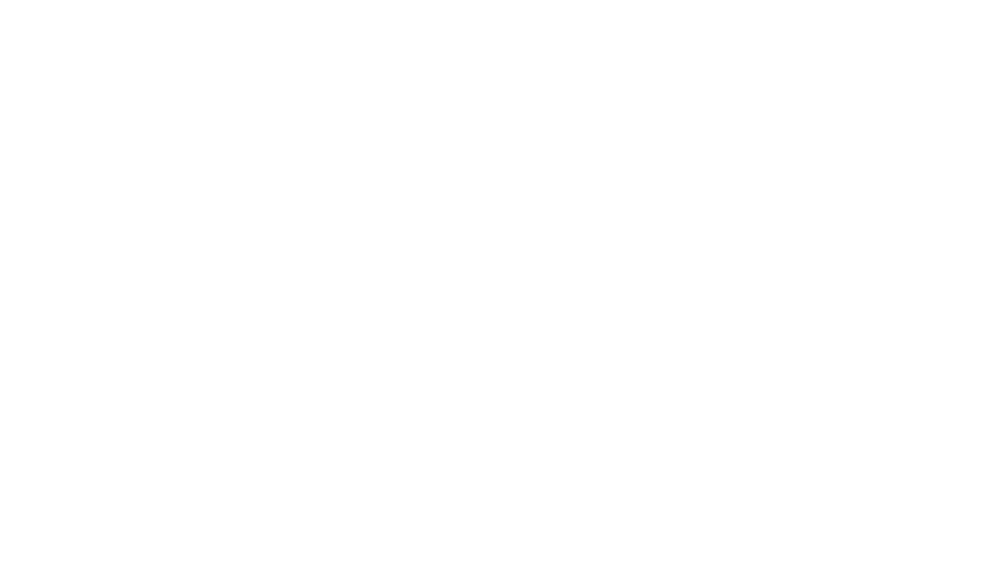

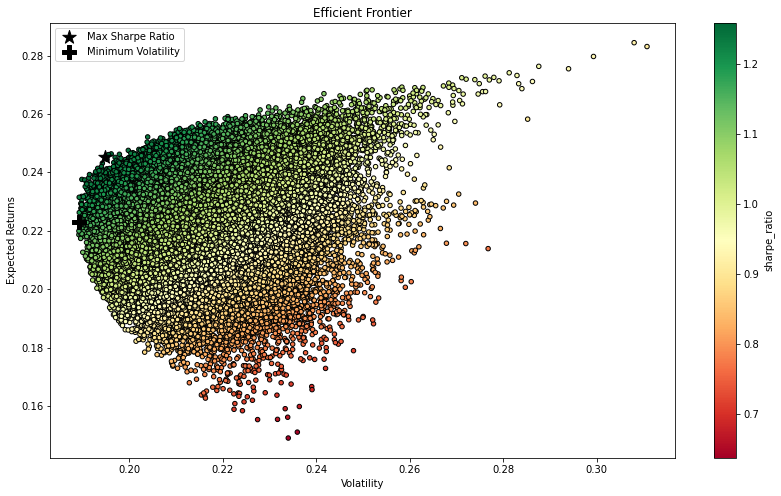

In [125]:
# Usiamo la volatilià trovata prima
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility',
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black',
                      ax=ax)
ax.scatter(x=max_sharpe_portf.volatility,
           y=max_sharpe_portf.returns,
           c='black', marker='*',
           s=200, label='Max Sharpe Ratio')

ax.scatter(x=min_vol_portf.volatility,
           y=min_vol_portf.returns,
           c='black', marker='P',
           s=200, label='Minimum Volatility')

ax.set(xlabel='Volatility', ylabel='Expected Returns',
       title='Efficient Frontier')
ax.legend()

### 6.3 Metodo analitico: scipy

Usando questo metodo sfruttiamo la ottimizzazione numerica per ottenere il portfolio con shapre ratio migliore

In [ ]:
# Importiamo le librerie necessarie

# Definiamo le funzioni necessarie per calcolare i rendimenti del portfolio
def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

# Definiamo la funzione per calcolare la frontiera di efficienza
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):
    efficient_portfolios = []
    n_assets = len(avg_returns)
    args = (avg_returns, cov_mat)
    bounds = tuple((0,1) for asset in range(n_assets))
    initial_guess = n_assets * [1. / n_assets, ]
    for ret in rtns_range:
        constraints = ({'type': 'eq',
                        'fun': lambda x: get_portf_rtn(x, avg_rtns)
                        - ret},
                       {'type': 'eq',
                        'fun': lambda x: np.sum(x) - 1})
        efficient_portfolio = sco.minimize(get_portf_vol,
                                           initial_guess,
                                           args=args,
                                           method='SLSQP',
                                           constraints=constraints,
                                           bounds=bounds)
        efficient_portfolios.append(efficient_portfolio)
    return efficient_portfolios

# Definiamo il range considerato dei rendimenti
rtns_range = np.linspace(-0.22, 0.32, 200)

# Calcoliamo la frontiera di efficenza
efficient_portfolios = get_efficient_frontier(avg_returns,
                                              cov_mat,
                                              rtns_range)

# Estraiamo le volatilità dei portafogli efficenti
vols_range = [x['fun'] for x in efficient_portfolios]
